<div style="border-radius:10px; padding: 30px; background-color: #ADD8E6; font-size:90%; text-align:left">
    <p style="font-family:Georgia; font-size:400%;font-weight:bold;text-align:center;color:darkblue;">
        📈 Google Stock Price Forecasting 📉
    </p>
    <p style="font-family:NewTimesRoman; font-size:300%;font-weight:bold;text-align:center;color:teal;">
        Powered by 🧠 LSTM Neural Networks 🖥️
    </p>
    <p style="font-family:NewTimesRoman; font-size:200%;font-weight:bold;text-align:center;color:indigo;">
        Coder: Hamed Mahmoudi 👨‍💻
    </p>
    <p style="font-family:NewTimesRoman; font-size:100%;font-weight:bold;text-align:center;color:red;">
        ⛔Dead-End⛔
    </p>
</div>

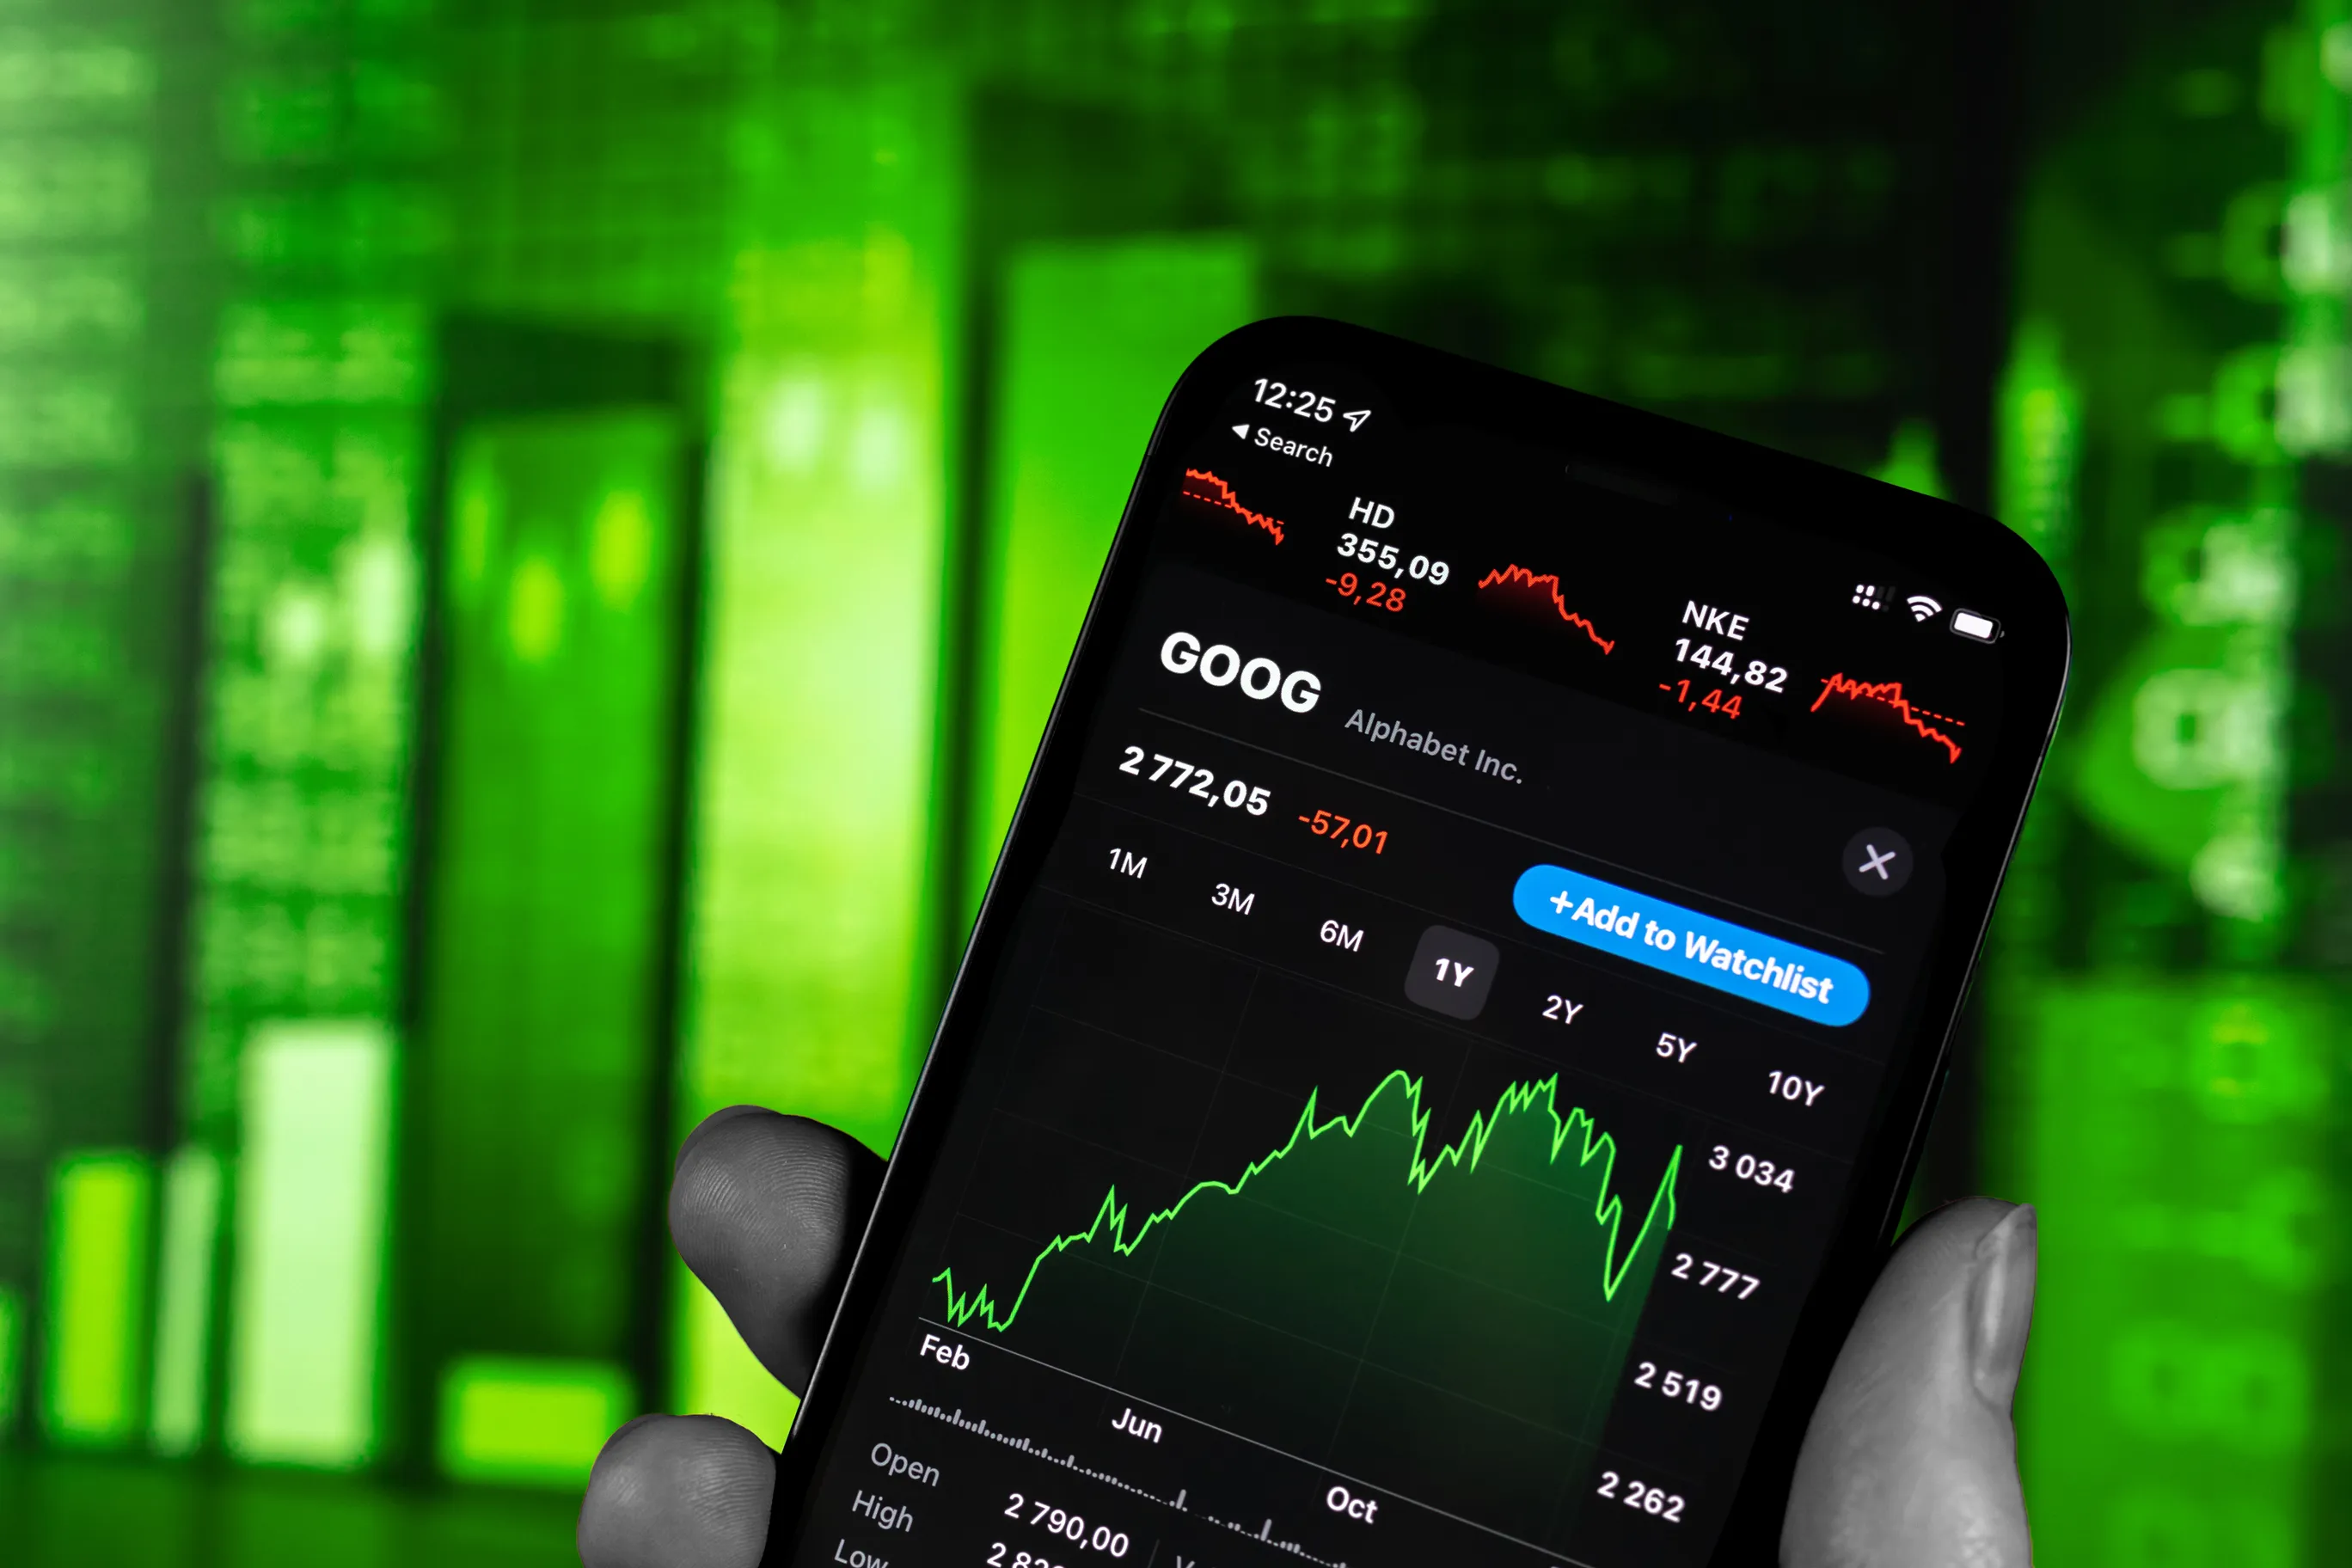
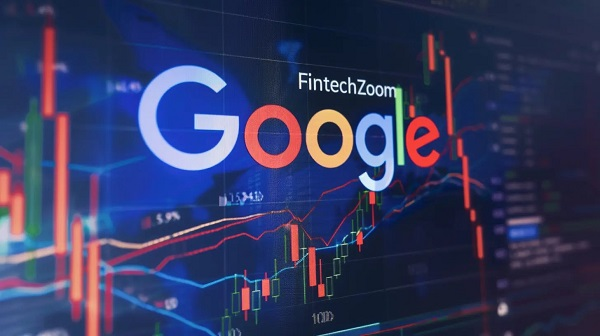

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <h3 align="left"><font color="navy">📊 Google Stock Price Forecasting 📊</font></h3>
    <p style="color:navy;">
        Forecasting stock prices is a challenging task influenced by numerous factors such as global events 🌍, company-specific news 🏢, market trends 📈, and investor sentiment 🤔.
        While this notebook leverages advanced machine learning techniques, particularly LSTM Neural Networks 🧠, it is important to acknowledge that predictions in the stock market are inherently uncertain. 
        This notebook represents an experimental attempt to understand and model stock price movements using historical data and technical indicators. 🎯
    </p>
</div>

<a id="c_table"></a> 

<div style="border-radius:10px; padding: 15px; background-color: #c0e5e9; font-size:115%; text-align:left">

<h3 align="left"><font color=navy>Table of Contents:</font></h3>
<font color=navy>
        
* [1 | Libraries 📚](#lib)
* [2 | Fetching Dataset 🗄](#data)
* [3 | Dataset Description 📖](#datades)
* [4 | Preprocessing🎓](#preprocessing)
    - [4.1 - Drop unnecessary column 🚮](#Drop)
    - [4.2 - Feature Engineering (Technical Indicators) 🛠](#features)
        - [4.2.1 - Simple Moving Average (SMA) 🛠](#SMA)
        - [4.2.2 - Exponential Moving Average (EMA) 🛠](#EMA)
        - [4.2.3 - Moving Average Convergence Divergence (MACD) 🛠](#MACD)
        - [4.2.4 - Relative Strength Index (RSI) 🛠](#RSI)
        - [4.2.5 - Bollinger Bands 🛠](#BB)
    - [4.3 - Price Change Analysis 📊](#price_change)
        - [4.3.1 - Daily Price Difference 📊](#daily_diff)
        - [4.3.2 - Daily Percentage Change 📊](#daily_pct)
* [5 | Visualizing📈](#Visualizing)
* [6 | RNN (LSTM)📊](#RNN)
    - [6.1 - close only 📈](#close)
    - [6.2 - close with indicators 📈](#indicators_close)
    - [6.3 - indicators without close 📈](#indicators_close_excluded)
    - [6.4 - indicators with daily diff 📈](#indicators_diff)
    - [6.5 - indicators without daily diff 📈](#indicators_without_diff)
* [7 | Result📊](#result)

<a id="lib"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">1 - Libraries 📚</p>

⬆️ [Table of Contents](#c_table)

In [1]:
!pip install -q yahoo_fin

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2024.8.0 requires dask==2024.8.0, but you have dask 2024.12.1 which is incompatible.
google-genai 0.3.0 requires websockets<15.0dev,>=13.0, but you have websockets 10.4 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
import yahoo_fin.stock_info as si
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(style="darkgrid")

<a id="data"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">2 - Fetching Dataset 🗄</p>

⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        This code retrieves historical stock data for Google (GOOG) from Yahoo Finance, spanning the period from <b>January 1, 2016</b>, to the current date 📅.
    </p>
</div>

In [3]:
start_date = '2016-01-04'
end_date = datetime.today().strftime('%Y-%m-%d')

historical_data = si.get_data('GOOG', start_date=start_date, end_date=end_date)

df = pd.DataFrame(historical_data)

display(df)

,open,high,low,close,adjclose,volume,ticker
2016-01-04,37.150002,37.202999,36.562901,37.091999,36.959202,65456000,GOOG
2016-01-05,37.322498,37.599998,36.931999,37.129002,36.996071,39014000,GOOG
2016-01-06,36.500000,37.359001,36.445999,37.181000,37.047882,38940000,GOOG
2016-01-07,36.515499,36.924999,35.952999,36.319500,36.189468,59274000,GOOG
2016-01-08,36.572498,36.661499,35.650002,35.723499,35.595604,49018000,GOOG
...,...,...,...,...,...,...,...
2024-12-31,192.445007,193.250000,189.580002,190.440002,190.440002,14355200,GOOG
2025-01-02,191.485001,193.199997,188.710007,190.630005,190.630005,17545200,GOOG
2025-01-03,192.725006,194.500000,191.350006,193.130005,193.130005,12875000,GOOG
2025-01-06,195.149994,199.559998,195.059998,197.960007,197.960007,19483300,GOOG


<a id="datades"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">3 - Dataset Description📖</p>

⬆️ [Table of Contents](#c_table)

<div style="border-radius:10px; padding: 15px; font-size:115%; text-align:left">

<h3 align="left"><font color=cyan>📊 Dataset Description:</font></h3>
    
| __Index__      | __Variable__ | __Description__      |
|:----|:----|:----|
| 1  | __open__ | _The opening stock price for Google (GOOG) on a given day._ |
| 2  | __high__ | _The highest stock price recorded for the day._ |
| 3  | __low__ | _The lowest stock price recorded for the day._ |
| 4  | __close__ | _The closing stock price for the day._ |
| 5  | __adjclose__ | _The adjusted closing price after accounting for stock splits and dividends._ |
| 6  | __volume__ | _The total number of shares traded during the day._ |
| 7  | __ticker__ | _The stock symbol for the company, which is "GOOG" in this dataset._ |

In [4]:
print('\n Dataset summary : \n')

pd.concat([pd.DataFrame(df.count()).T.rename(index={0: 'count'}),
           pd.DataFrame(df.nunique()).T.rename(index={0: 'number of unique'}),
           pd.DataFrame(df.dtypes).T.rename(index={0: 'dtype'}),
           pd.DataFrame(df.isna().sum()).T.rename(index={0: 'null count'}),
           df.describe().drop('count')]).T


 Dataset summary : 



,count,number of unique,dtype,null count,mean,std,min,25%,50%,75%,max
open,2268,2204,float64,0,88.786788,43.30854,33.392502,52.851376,73.713253,126.624998,198.529999
high,2268,2235,float64,0,89.748616,43.798075,33.615002,53.489376,74.5,127.844498,202.880005
low,2268,2236,float64,0,87.910922,42.869073,33.153,52.287002,73.193249,125.701561,196.690002
close,2268,2231,float64,0,88.844356,43.32404,33.412998,52.835502,73.98875,126.686373,198.160004
adjclose,2268,2234,float64,0,88.549389,43.215822,33.293373,52.646339,73.723854,126.232807,198.160004
volume,2268,2194,int64,0,29571074.470899,14078904.589213,6809800.0,20730000.0,26187000.0,33953500.0,126962000.0
ticker,2268,1,object,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <h3 align="left"><font color="navy">📋 Dataset Summary:</font></h3>
    <p style="color:navy;">
        The dataset consists of 2,262 rows and 7 columns, summarizing stock price information for Google (GOOG). Key details from the summary are:
    </p>
    <ul style="color:navy;">
        <li>All columns, except for <b>ticker</b>, contain continuous numeric data with no missing values (null count = 0).</li>
        <li>The <b>open</b>, <b>high</b>, <b>low</b>, <b>close</b>, and <b>adjclose</b> columns represent the stock prices in different states, showing variability across 2,198–2,230 unique values.</li>
        <li>The <b>volume</b> column records the daily traded shares, with a high standard deviation indicating large fluctuations in trading activity.</li>
        <li>The <b>ticker</b> column, containing only one unique value ("GOOG"), does not add valuable information for analysis and will be dropped to streamline the dataset. 🚮</li>
    </ul>
    <p style="color:navy;">
        Overall, the dataset is clean, comprehensive, and ready for further analysis after removing the <b>ticker</b> column.
    </p>
</div>


<a id="preprocessing"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">4 - Preprocessing🎓</p>

⬆️ [Table of Contents](#c_table)

<a id="Drop"></a>
## <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.1 - <span style="color:steelblue;font-weight:bold">Drop unnecessary column 🚮
    
⬆️ [Section](#preprocessing)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        The <b>ticker</b> column in the dataset contains only a single unique value ("GOOG"), which does not contribute meaningful information for our analysis. We will drop this unnecessary column. 🚮
    </p>
</div>


In [5]:
df.drop(columns = ['ticker'], inplace = True)
print(list(df.columns))

['open', 'high', 'low', 'close', 'adjclose', 'volume']


<a id="features"></a>
## <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.2 - <span style="color:steelblue;font-weight:bold">Feature Engineering (Technical Indicators) 🛠
    
⬆️ [Section](#preprocessing)

<a id="SMA"></a>
### <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.2.1 - <span style="color:steelblue;font-weight:bold">Simple Moving Average (SMA) 🛠
    
⬆️ [Section](#features)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        📊 <b>Simple Moving Average (SMA):</b><br><br>
        The SMA is a widely used technical indicator in financial analysis that calculates the average price of an asset over a specified number of days. It is a great tool for identifying trends and smoothing out price fluctuations. SMAs are computed here for 3, 7, 15, and 30-day windows using the <b>closing price</b>.<br><br>
        <b>Formula:</b> 
        <br><center>
        <span style="font-size:120%; font-weight:bold; color:navy;">SMA = (P<sub>1</sub> + P<sub>2</sub> + ... + P<sub>n</sub>) / n</span>
        </center>
        <br>Where:<br>
        <ul style="color:navy; padding-left:20px;">
            <li><b>P<sub>1</sub>, P<sub>2</sub>, ..., P<sub>n</sub>:</b> Closing prices over the chosen time period.</li>
            <li><b>n:</b> The number of days in the moving average window.</li>
        </ul>
        💡 In this case, missing values at the beginning of each SMA are filled with the corresponding closing prices to ensure smoothness in calculations.<br><br>
        ✨ These SMAs help identify short-term and long-term price trends for better analysis and decision-making. 📈
            </font>
    </p>
</div>

In [6]:
df['SMA3'] = df['close'].rolling(window=3).mean()
df['SMA3'] = df['SMA3'].fillna(df['close'])

df['SMA7'] = df['close'].rolling(window=7).mean()
df['SMA7'] = df['SMA7'].fillna(df['close'])

df['SMA15'] = df['close'].rolling(window=15).mean()
df['SMA15'] = df['SMA15'].fillna(df['close'])

df['SMA30'] = df['close'].rolling(window=30).mean()
df['SMA30'] = df['SMA30'].fillna(df['close'])

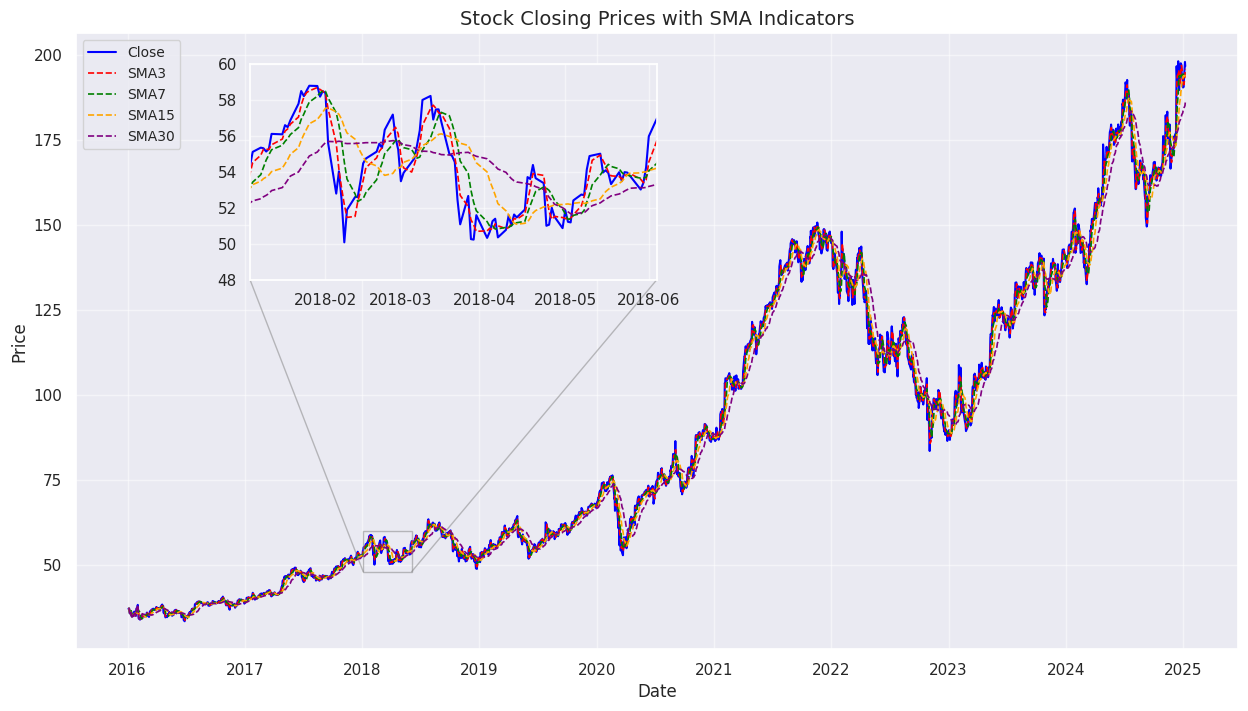

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))

# Main plot
ax.plot(df['close'], label='Close', color='blue', linewidth=1.5)
ax.plot(df['SMA3'], label='SMA3', linestyle='--', color='red', linewidth=1.2)
ax.plot(df['SMA7'], label='SMA7', linestyle='--', color='green', linewidth=1.2)
ax.plot(df['SMA15'], label='SMA15', linestyle='--', color='orange', linewidth=1.2)
ax.plot(df['SMA30'], label='SMA30', linestyle='--', color='purple', linewidth=1.2)

# Labels and title
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
ax.set_title("Stock Closing Prices with SMA Indicators", fontsize=14)
ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.5)

# Define inset axes
axin = ax.inset_axes([0.15, 0.6, 0.35, 0.35])  

# Plot data in the inset
axin.plot(df['close'], label='Close', color='blue', linewidth=1.5)
axin.plot(df['SMA3'], label='SMA3', linestyle='--', color='red', linewidth=1.2)
axin.plot(df['SMA7'], label='SMA7', linestyle='--', color='green', linewidth=1.2)
axin.plot(df['SMA15'], label='SMA15', linestyle='--', color='orange', linewidth=1.2)
axin.plot(df['SMA30'], label='SMA30', linestyle='--', color='purple', linewidth=1.2)

# Focus on a specific region
axin.set_xlim(pd.Timestamp("2018-01-04"), pd.Timestamp("2018-06-04"))
axin.set_ylim(48, 60)

# Highlight the zoomed-in area
ax.indicate_inset_zoom(axin)

# Show grid in the inset
axin.grid(alpha=0.5)

# Display the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        The <b>SMA3</b> closely follows the closing price due to its shorter window, making it highly responsive to price fluctuations. The <b>SMA7</b> smooths out short-term volatility while retaining key trend features. On the other hand, <b>SMA15</b> and <b>SMA30</b> provide progressively smoother curves, capturing medium- and long-term trends. <br><br>
        Shorter SMAs like SMA3 respond faster to price changes, while longer SMAs like SMA30 lag significantly but provide a stable trend line.
    </p>
</div>


<a id="EMA"></a>
### <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.2.2 - <span style="color:steelblue;font-weight:bold">Exponential Moving Average (EMA) 🛠
    
⬆️ [Section](#features)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        📊 <b>Exponential Moving Average (EMA):</b><br><br>
        The EMA is a popular technical indicator in financial analysis that assigns exponentially decreasing weights to older prices, making it more responsive to recent price changes compared to the Simple Moving Average (SMA). It is especially useful for identifying trends and capturing recent market movements.<br><br>
        <b>Formula:</b> 
        <br><center>
        <span style="font-size:120%; font-weight:bold; color:navy;">EMA<sub>t</sub> = (P<sub>t</sub> × α) + EMA<sub>t-1</sub> × (1 - α)</span>
        </center>
        <br>Where:<br>
        <ul style="color:navy; padding-left:20px;">
            <li><b>P<sub>t</sub>:</b> The current price (e.g., closing price).</li>
            <li><b>α (alpha):</b> Smoothing factor = 2 / (n + 1), where <b>n</b> is the span of the EMA.</li>
            <li><b>EMA<sub>t-1</sub>:</b> The EMA value from the previous period.</li>
        </ul>
        💡 Here, the EMA is calculated for 15 and 30-day spans using the <b>closing price</b>. The parameter <b>adjust=False</b> ensures that the weights are applied consistently across all data points.<br><br>
        ✨ The EMA provides a smoothed representation of price trends while being more sensitive to recent price movements, making it a valuable tool for traders and analysts. 📈
        </font>
    </p>
</div>


In [8]:
df['EMA15'] = df['close'].ewm(span=15, adjust=False).mean()
df['EMA30'] = df['close'].ewm(span=30, adjust=False).mean()

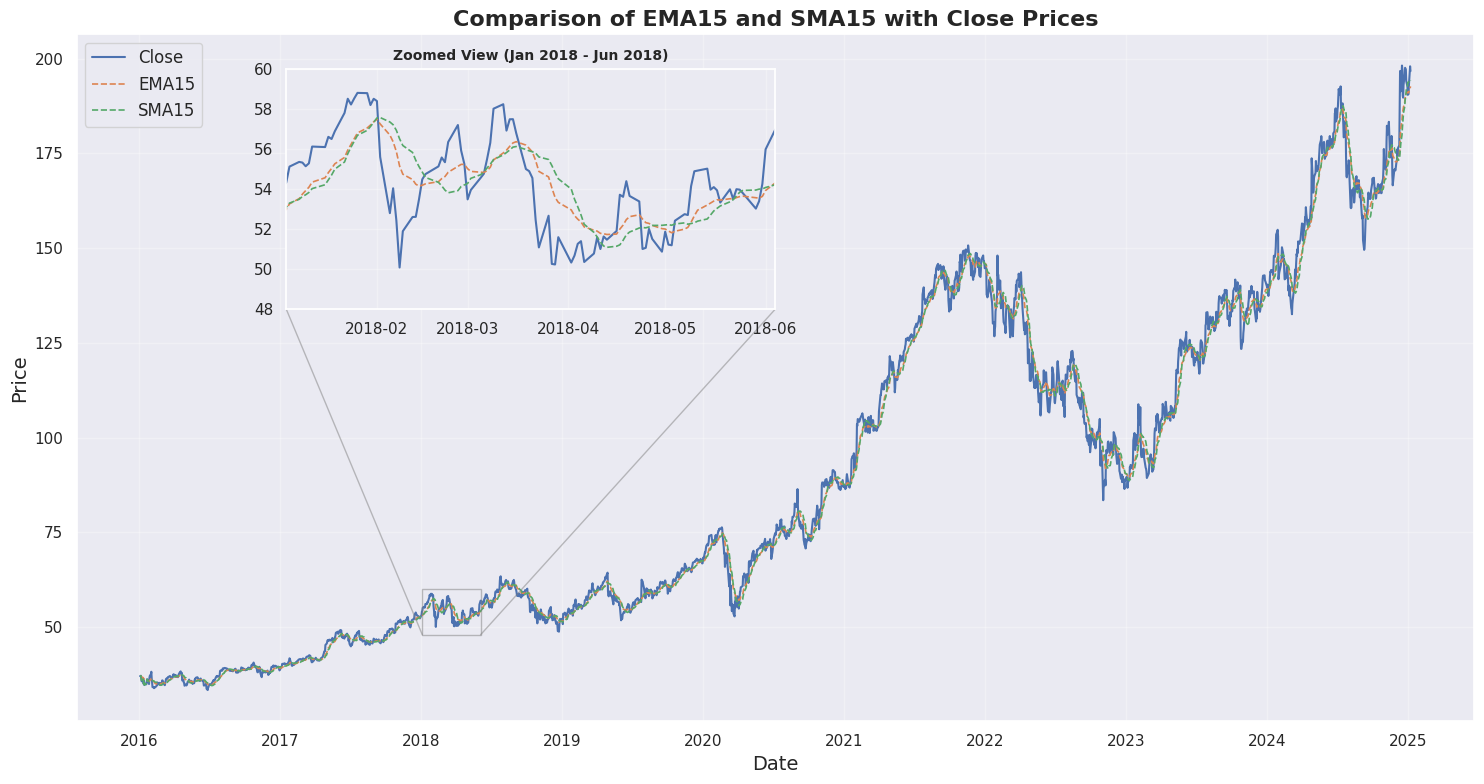

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))

# Main plot
ax.plot(df['close'], label='Close', linewidth=1.5)
ax.plot(df['EMA15'], label='EMA15', linestyle='--', linewidth=1.2)
ax.plot(df['SMA15'], label='SMA15', linestyle='--', linewidth=1.2)

# Adding title and labels
ax.set_title('Comparison of EMA15 and SMA15 with Close Prices', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.legend(fontsize=12)
ax.grid(alpha=0.3)

# Define inset axes (bounds = [x, y, width, height])
axin = ax.inset_axes([0.15, 0.6, 0.35, 0.35])  # Adjust size and location as needed

# Plot data in the inset
axin.plot(df['close'], label='Close', linewidth=1.5)
axin.plot(df['EMA15'], label='EMA15', linestyle='--', linewidth=1.2)
axin.plot(df['SMA15'], label='SMA15', linestyle='--', linewidth=1.2)

# Adding inset-specific settings
axin.set_title('Zoomed View (Jan 2018 - Jun 2018)', fontsize=10, fontweight='bold')
axin.set_xlim(pd.Timestamp("2018-01-04"), pd.Timestamp("2018-06-04"))  # Use datetime range
axin.set_ylim(48, 60)
axin.grid(alpha=0.3)

# Highlight the zoomed-in area
ax.indicate_inset_zoom(axin)

# Show the plot
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        ✨ <b>Key Observations:</b>
        <ul style="color:navy; padding-left:20px;">
            <li>The <b>EMA15</b> tracks the <b>closing prices</b> more closely than the <b>SMA15</b>, as EMA assigns greater weight to recent prices.</li>
            <li>SMA provides a smoother curve but lags behind price trends due to equal weighting of all data points in the window.</li>
        </ul>
        💡 This responsiveness of EMA makes it more suitable for short-term trend analysis, while SMA is often used for longer-term trend smoothing. Both are valuable tools for identifying market trends and analyzing price dynamics. 📈
        </font>
    </p>
</div>


<a id="MACD"></a>
### <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.2.3 - <span style="color:steelblue;font-weight:bold">Moving Average Convergence Divergence (MACD) 🛠
    
⬆️ [Section](#features)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        📊 <b>Moving Average Convergence Divergence (MACD):</b><br><br>
        The MACD is a powerful momentum indicator that highlights the relationship between two exponential moving averages (EMAs) of a stock's price. It is commonly used to identify trends, reversals, and strength of momentum in financial analysis. In this implementation, the MACD is calculated using 12-day and 26-day EMAs of the closing price.<br><br>
        <b>Formula:</b> 
        <br><center>
        <span style="font-size:120%; font-weight:bold; color:navy;">
        MACD = EMA<sub>12</sub> - EMA<sub>26</sub>
        </span>
        </center>
        <br>Where:<br>
        <ul style="color:navy; padding-left:20px;">
            <li><b>EMA<sub>12</sub>:</b> 12-day Exponential Moving Average of the closing price.</li>
            <li><b>EMA<sub>26</sub>:</b> 26-day Exponential Moving Average of the closing price.</li>
        </ul>
        💡 The MACD line is often accompanied by a "signal line," which is the 9-day EMA of the MACD. Crossovers between the MACD and signal lines are widely used as trading signals.<br><br>
        ✨ The MACD helps traders understand whether the trend is bullish or bearish. When the MACD is positive, it indicates upward momentum, and when negative, it suggests downward momentum. Divergences between the MACD and price action can also signal potential trend reversals. 📈
        </font>
    </p>
</div>


In [10]:
df['MACD'] = (df['close'].ewm(span=12, adjust=False).mean()) - (df['close'].ewm(span=26, adjust=False).mean())

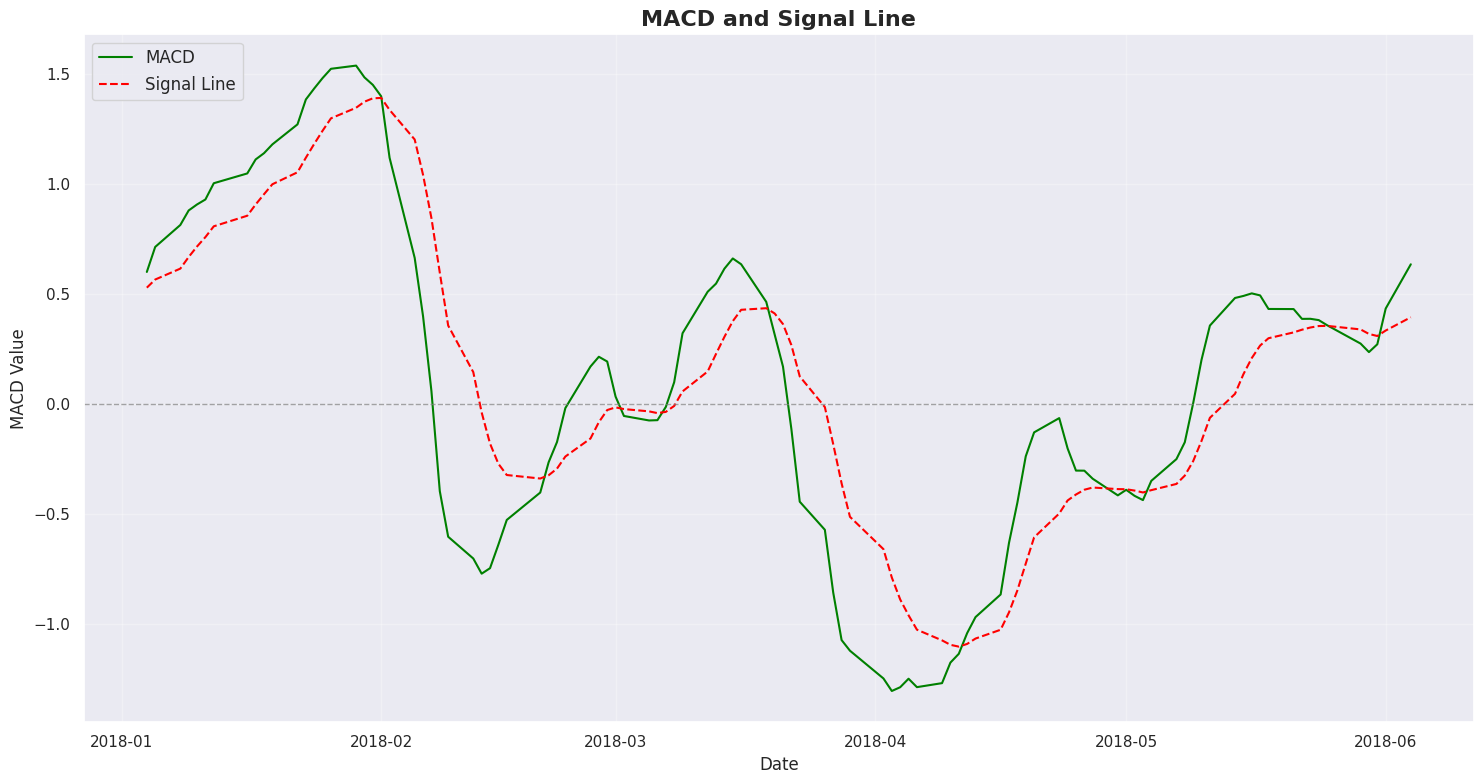

In [11]:
# Generate Signal Line
Signal_Line = df['MACD'].ewm(span=9, adjust=False).mean()  # Signal Line

# Filter the DataFrame for the specified date range
start_date = pd.Timestamp("2018-01-04")
end_date = pd.Timestamp("2018-06-04")
filtered_df = df.loc[start_date:end_date]

# Plotting MACD and Signal Line
fig, ax = plt.subplots(figsize=(15, 8))

# Plot MACD Line
ax.plot(filtered_df.index, filtered_df['MACD'], label='MACD', color='green', linewidth=1.5)

# Plot Signal Line
ax.plot(filtered_df.index, Signal_Line.loc[start_date:end_date], label='Signal Line', color='red', linestyle='--', linewidth=1.5)

# Highlight Zero Line
ax.axhline(0, color='gray', linewidth=1, linestyle='--', alpha=0.7)

# Adding Labels and Title
ax.set_title('MACD and Signal Line', fontsize=16, weight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('MACD Value', fontsize=12)

# Adding Legend
ax.legend(loc='upper left', fontsize=12)

# Grid for Better Visualization
ax.grid(alpha=0.3)

# Show the Plot
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        💡 <b>Insights:</b><br>
        <ul style="color:navy; padding-left:20px;">
            <li><b>Above Zero Line:</b> Indicates bullish momentum as the short-term EMA exceeds the long-term EMA.</li>
            <li><b>Below Zero Line:</b> Indicates bearish momentum as the long-term EMA dominates.</li>
            <li><b>Crossovers:</b> When the MACD crosses above the Signal Line, it may suggest a buy signal, while crossing below it could indicate a sell signal.</li>
            <li><b>Volatility:</b> Larger oscillations in the MACD highlight higher price volatility over time.</li>
        </ul>
        ✨ This visualization aids in identifying trend reversals, momentum shifts, and potential entry/exit points for trading decisions. 📈📉
        </font>
    </p>
</div>


<a id="RSI"></a>
### <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.2.4 - <span style="color:steelblue;font-weight:bold">Relative Strength Index (RSI) 🛠
    
⬆️ [Section](#features)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        📊 <b>Relative Strength Index (RSI):</b><br><br>
        The <b>RSI</b> is a momentum oscillator that measures the speed and change of price movements on a scale from 0 to 100. It is commonly used to identify overbought or oversold conditions in an asset.<br><br>
        <b>Formula:</b><br>
        <center>
        <span style="font-size:120%; font-weight:bold; color:navy;">
        RSI = 100 - (100 / (1 + RS))<br>
        RS = Average Gain (14 periods) / Average Loss (14 periods)
        </span>
        </center>
        <br><br>
        💡 <b>Insights:</b><br>
        <ul style="color:navy; padding-left:20px;">
            <li><b>RSI > 70:</b> Indicates overbought conditions, suggesting a potential reversal or correction.</li>
            <li><b>RSI < 30:</b> Indicates oversold conditions, signaling a possible upward reversal.</li>
            <li><b>50 Level:</b> Acts as a midpoint, with values above suggesting bullish momentum and below indicating bearish momentum.</li>
        </ul>
        ✨ This indicator helps traders evaluate market momentum and identify potential buy or sell opportunities. 📈📉
        </font>
    </p>
</div>

In [12]:
delta = df['close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))
df['RSI'] = df['RSI'].fillna(50)

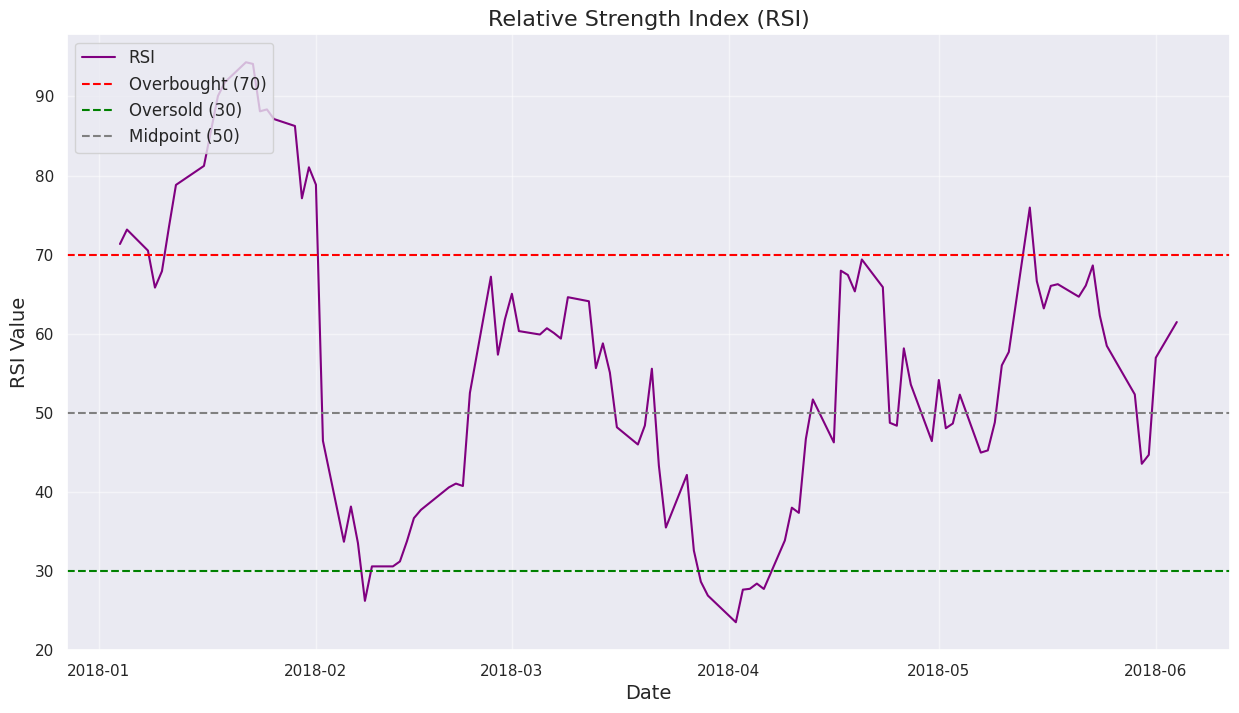

In [13]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 8))
start_date = pd.Timestamp("2018-01-04")
end_date = pd.Timestamp("2018-06-04")
filtered_df = df.loc[start_date:end_date]
# Plot the RSI values
ax.plot(filtered_df.index, filtered_df['RSI'], color='purple', label='RSI')

# Add horizontal lines for overbought and oversold levels
ax.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
ax.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
ax.axhline(y=50, color='gray', linestyle='--', label='Midpoint (50)')

# Customize the plot
ax.set_title('Relative Strength Index (RSI)', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('RSI Value', fontsize=14)
ax.legend(loc='upper left', fontsize=12)
ax.grid(alpha=0.5)

# Show the plot
plt.show()

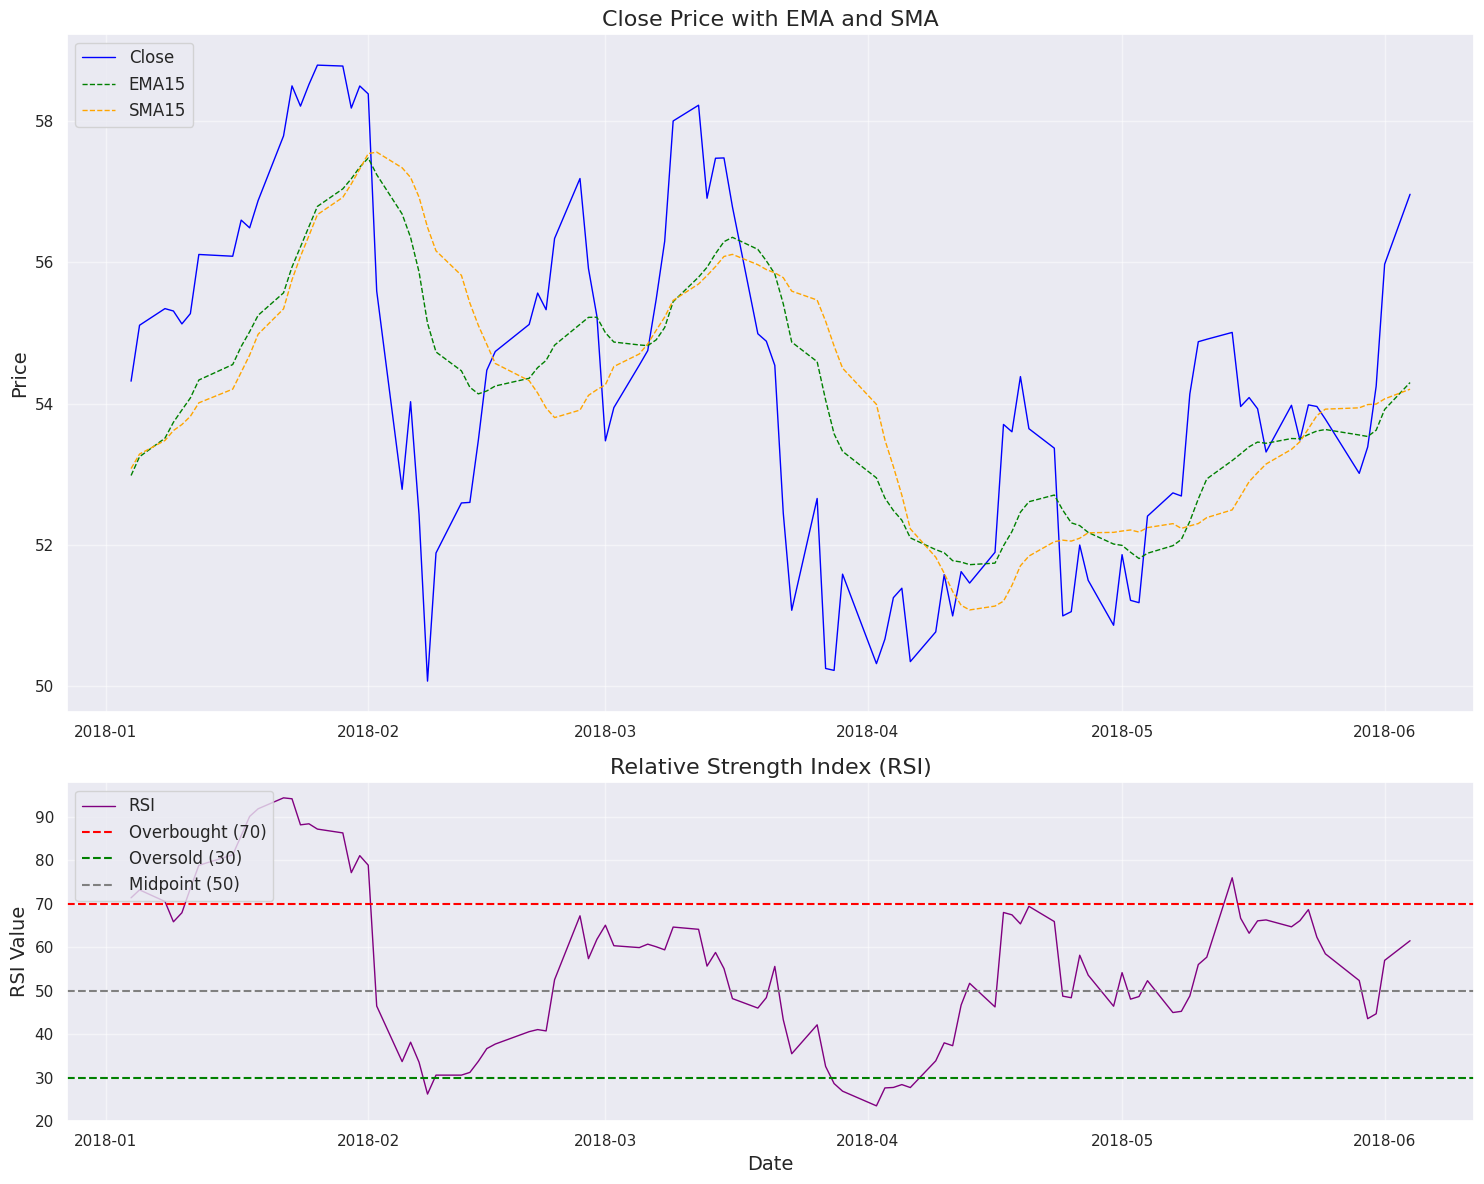

In [14]:
# Define the specific date range
start_date = pd.Timestamp("2018-01-04")
end_date = pd.Timestamp("2018-06-04")

# Slice the data to include only the specific period
filtered_df = df.loc[start_date:end_date]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), gridspec_kw={'height_ratios': [2, 1]})

# First subplot: Plot the close price with EMA and SMA
ax1.plot(filtered_df.index, filtered_df['close'], label='Close', color='blue', linewidth=1)
ax1.plot(filtered_df.index, filtered_df['EMA15'], label='EMA15', color='green', linestyle='--', linewidth=1)
ax1.plot(filtered_df.index, filtered_df['SMA15'], label='SMA15', color='orange', linestyle='--', linewidth=1)
ax1.set_title('Close Price with EMA and SMA', fontsize=16)
ax1.set_ylabel('Price', fontsize=14)
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(alpha=0.5)

# Second subplot: Plot RSI with overbought and oversold levels
ax2.plot(filtered_df.index, filtered_df['RSI'], label='RSI', color='purple', linewidth=1)
ax2.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
ax2.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
ax2.axhline(y=50, color='gray', linestyle='--', label='Midpoint (50)')
ax2.set_title('Relative Strength Index (RSI)', fontsize=16)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_ylabel('RSI Value', fontsize=14)
ax2.legend(loc='upper left', fontsize=12)
ax2.grid(alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        💡 <b>Insights:</b><br>
        <ul style="color:navy; padding-left:20px;">
            <li><b>Close Price with EMA and SMA:</b> 
                <ul style="color:navy; padding-left:20px;">
                    <li><b>EMA15:</b> Reacts quickly to price changes, making it suitable for short-term trend analysis.</li>
                    <li><b>SMA15:</b> Smoother and better for identifying long-term trends.</li>
                    <li><b>Crossovers:</b> When EMA15 crosses above SMA15, it may indicate bullish momentum, while crossing below suggests bearish momentum.</li>
                </ul>
            </li>
            <li><b>Relative Strength Index (RSI):</b> 
                <ul style="color:navy; padding-left:20px;">
                    <li><b>Overbought (>70):</b> Indicates potential reversal or pullback.</li>
                    <li><b>Oversold (<30):</b> Suggests potential buying opportunities.</li>
                    <li><b>Midpoint (50):</b> Reflects neutral momentum.</li>
                </ul>
            </li>
        </ul>
        ✨ This visualization combines trend analysis (via EMA and SMA) and momentum analysis (via RSI) to identify potential trading opportunities and refine entry/exit decisions. 📈📉
        </font>
    </p>
</div>


<a id="BB"></a>
### <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.2.5 - <span style="color:steelblue;font-weight:bold">Bollinger Bands 🛠
    
⬆️ [Section](#features)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        📊 <b>Bollinger Bands:</b><br><br>
        <b>Bollinger Bands</b> are a popular technical analysis tool designed to measure market volatility and identify overbought or oversold conditions. They consist of three lines: a <b>Middle Band</b> (Simple Moving Average), an <b>Upper Band</b>, and a <b>Lower Band</b>. The distance between the bands changes dynamically based on the asset's price volatility.<br><br>
        <b>Formula:</b><br>
        <center>
        <span style="font-size:120%; font-weight:bold; color:navy;">
        Upper Band = Middle Band + (Number of Std Dev × Standard Deviation)<br>
        Lower Band = Middle Band - (Number of Std Dev × Standard Deviation)
        </span>
        </center>
        <br><br>
        💡 <b>Insights:</b><br>
        <ul style="color:navy; padding-left:20px;">
            <li><b>Upper Band:</b> Indicates potential overbought levels or resistance when the price touches or exceeds this band.</li>
            <li><b>Lower Band:</b> Indicates potential oversold levels or support when the price touches or falls below this band.</li>
            <li><b>Middle Band:</b> Serves as a trend indicator, representing the 20-period SMA of the closing price.</li>
            <li><b>Volatility:</b> Wide bands indicate higher volatility, while narrow bands suggest lower volatility.</li>
        </ul>
        ✨ Bollinger Bands provide traders with insights into price extremes, trend strength, and potential reversal points, aiding in better trading decisions. 📈📉
        </font>
    </p>
</div>

In [15]:
window = 20  # Period for SMA
num_std_dev = 2  # Number of standard deviations

# Calculate the Middle Band (SMA)
df['Middle_Band'] = df['close'].rolling(window=window).mean()

# Calculate the Upper and Lower Bands
df['Upper_Band'] = df['Middle_Band'] + (num_std_dev * (df['close'].rolling(window=window).std()))
df['Lower_Band'] = df['Middle_Band'] - (num_std_dev * (df['close'].rolling(window=window).std()))

df['Upper_Band'] = df['Upper_Band'].fillna(df['close'])
df['Lower_Band'] = df['Lower_Band'].fillna(df['close'])

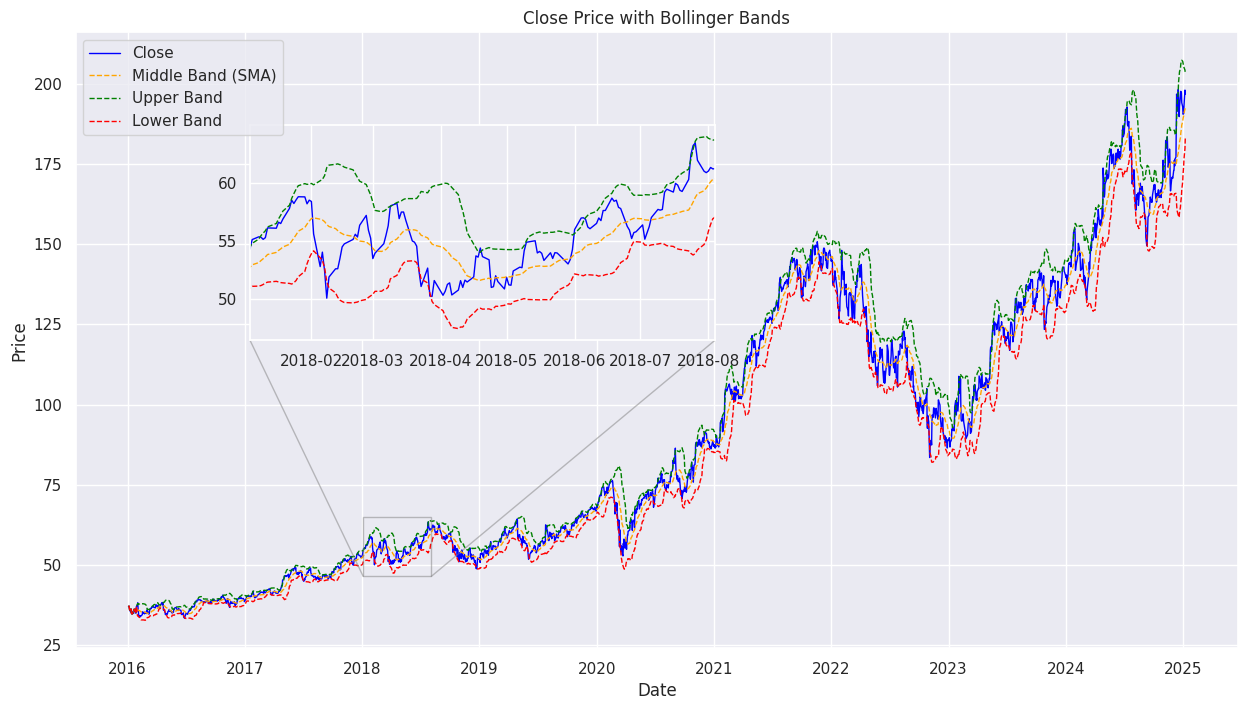

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the main chart
ax.plot(df['close'], label='Close', color='blue', linewidth=1)
ax.plot(df['Middle_Band'], label='Middle Band (SMA)', linestyle='--', color='orange', linewidth=1)
ax.plot(df['Upper_Band'], label='Upper Band', linestyle='--', color='green', linewidth=1)
ax.plot(df['Lower_Band'], label='Lower Band', linestyle='--', color='red', linewidth=1)

# Add legend and grid
ax.legend(loc='upper left')
ax.set_title('Close Price with Bollinger Bands')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.grid(True)

# Define inset axes (bounds = [x, y, width, height])
axin = ax.inset_axes([0.15, 0.5, 0.4, 0.35])  # Adjust size and location as needed

# Plot Bollinger Bands in the inset
axin.plot(df['close'], label='Close', color='blue', linewidth=1)
axin.plot(df['Middle_Band'], label='Middle Band (SMA)', linestyle='--', color='orange', linewidth=1)
axin.plot(df['Upper_Band'], label='Upper Band', linestyle='--', color='green', linewidth=1)
axin.plot(df['Lower_Band'], label='Lower Band', linestyle='--', color='red', linewidth=1)

# Focus on a specific region of interest
start_date = pd.Timestamp("2018-01-04")
end_date = pd.Timestamp("2018-08-04")
axin.set_xlim(start_date, end_date)  # Use datetime range for x-axis
axin.set_ylim(df['Lower_Band'].loc[start_date:end_date].min()-1, df['Upper_Band'].loc[start_date:end_date].max()+1)

# Remove legend in the inset for clarity
axin.grid(True)

# Highlight the zoomed-in area
ax.indicate_inset_zoom(axin)

# Show the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        💡 <b>Insights:</b><br>
        <ul style="color:navy; padding-left:20px;">
            <li>The close price is generally contained within the upper and lower bands, highlighting the typical price range.</li>
            <li><b>Upper Band:</b> Acts as a resistance level, indicating overbought conditions when the price nears or exceeds it.</li>
            <li><b>Lower Band:</b> Acts as a support level, indicating oversold conditions when the price nears or falls below it.</li>
            <li>In the zoomed-in region, price movements between the bands suggest volatility and potential trading opportunities.</li>
        </ul>
        ✨ This visualization highlights how Bollinger Bands can assist in identifying trends, price reversals, and potential trading opportunities based on the close price's position within the bands. 📈📉
        </font>
    </p>
</div>

<a id="price_change"></a>
## <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.3 - <span style="color:steelblue;font-weight:bold">Price Change Analysis 📊
    
⬆️ [Section](#preprocessing)

<a id="daily_diff"></a>
### <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.3.1 - <span style="color:steelblue;font-weight:bold">Daily Price Difference 📈
    
⬆️ [Section](#price_change)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        📊 <b>Daily Change in Close Price:</b><br><br>
        The goal of this code is to compute the daily difference in the <b>close price</b>, providing an alternative metric to analyze price movements.<br><br>
        Initially, a loop-based method was implemented to calculate the difference between consecutive close prices. However, ChatGPT suggested a more efficient approach using the <b>pandas</b> function <b>diff()</b>, which directly computes the difference between successive rows.<br><br>
        💡 <b>Efficiency:</b><br>
        <ul style="color:navy; padding-left:20px;">
            <li><b>Original Method:</b> Used a loop to calculate differences, requiring additional steps to insert and align values.</li>
            <li><b>Optimized Method:</b> The <b>diff()</b> function achieves the same result in a single line, filling missing values with 0 using <b>fillna(0)</b>.</li>
        </ul>
        ✨ This alternative method is concise, improves performance, and minimizes the complexity of the code. 📉
        </font>
    </p>
</div>

In [17]:
# I had written these codes before but chatgpt suggested using another method
#result_list = []
#for i in range(len(df['close']) - 1):
#    result = df['close'].iloc[i+1] - df['close'].iloc[i]
#    result_list.append(result)
#result_list.insert(0, 0)
#df['daily_change'] = result_list

#chatGPT :
df['daily_diff'] = df['close'].diff().fillna(0)

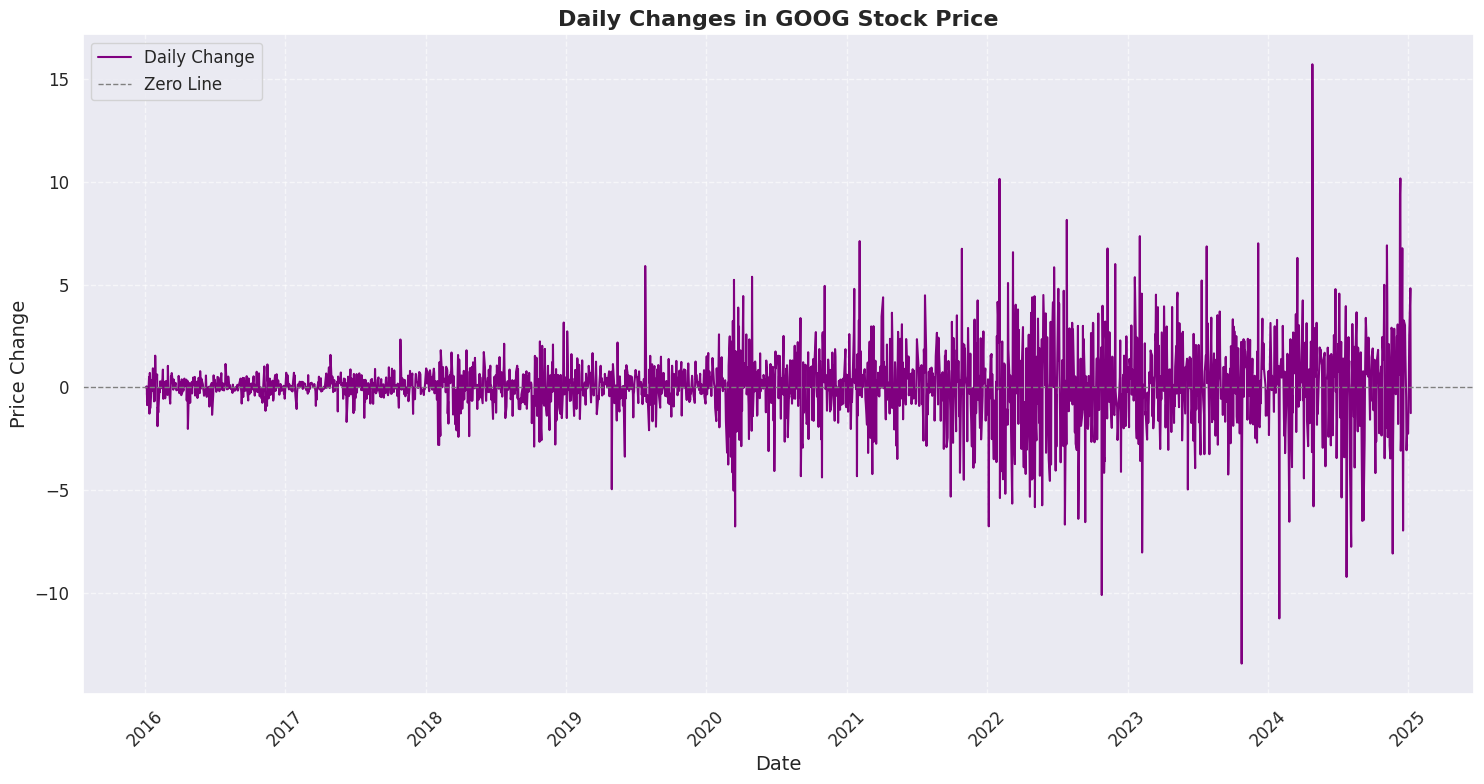

In [18]:
# Plot daily changes in close price
plt.figure(figsize=(15, 8))

# Plot the daily change
plt.plot(df['daily_diff'], label='Daily Change', color='purple', linewidth=1.5)

# Add labels and title
plt.title('Daily Changes in GOOG Stock Price', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price Change', fontsize=14)

# Add a horizontal line at zero for better visual reference
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Zero Line')

# Customize grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        💡 <b>Observations:</b><br>
        <ul style="color:purple; padding-left:20px;">
            <li>As the stock price increases over time, the magnitude of daily changes appears to grow as well.</li>
            <li>The increased volatility in recent years suggests larger movements in stock price, both upwards and downwards.</li>
            <li>Due to this trend, using daily changes as a target variable may not be ideal, as the increasing scale introduces challenges in maintaining consistent predictions or interpretations.</li>
        </ul>
        ✨ This plot emphasizes the evolving nature of the stock's volatility and the potential need for alternative metrics or adjustments when analyzing such data. 📈📉
        </font>
    </p>
</div>

<a id="daily_pct"></a>
### <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">4.3.2 - <span style="color:steelblue;font-weight:bold">Daily Percentage Change 📊
    
⬆️ [Section](#price_change)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        📊 <b>Daily Percentage Change in Close Price:</b><br><br>
        We wanted to calculate the daily percentage change in the <b>close price</b>, which is a useful metric for understanding relative price movement over time.<br><br>
        Initially, a loop-based approach was used to compute the percentage change by dividing the daily price difference (<b>daily_diff</b>) by the previous close price and multiplying by 100. ChatGPT suggested an optimized method using the <b>pandas</b> function <b>pct_change()</b>, which directly computes the percentage change between successive rows.<br><br>
        💡 <b>Efficiency:</b><br>
        <ul style="color:navy; padding-left:20px;">
            <li><b>Original Method:</b> Used a loop to calculate the percentage change, requiring additional steps to append and align values.</li>
            <li><b>Optimized Method:</b> The <b>pct_change()</b> function computes percentage changes in a single line, and multiplying by 100 gives the result as a percentage.</li>
        </ul>
        ✨ This optimized approach is cleaner, faster, and reduces code complexity while achieving the same result. 📉📈
        </font>
    </p>
</div>

In [19]:
# I had written these codes before but chatgpt suggested using another method
#dailychange_percent = []
#for i in range(len(df['close']) - 1):
#    result = df['daily_diff'].iloc[i + 1] / df['close'].iloc[i] * 100
#    dailychange_percent.append(result)
#
#dailychange_percent.insert(0, 0)
#df['daily_diff_percent'] = dailychange_percent

#chatGPT :
df['daily_diff_percent'] = df['close'].pct_change() * 100
df['daily_diff_percent'] = df['daily_diff_percent'].fillna(0)

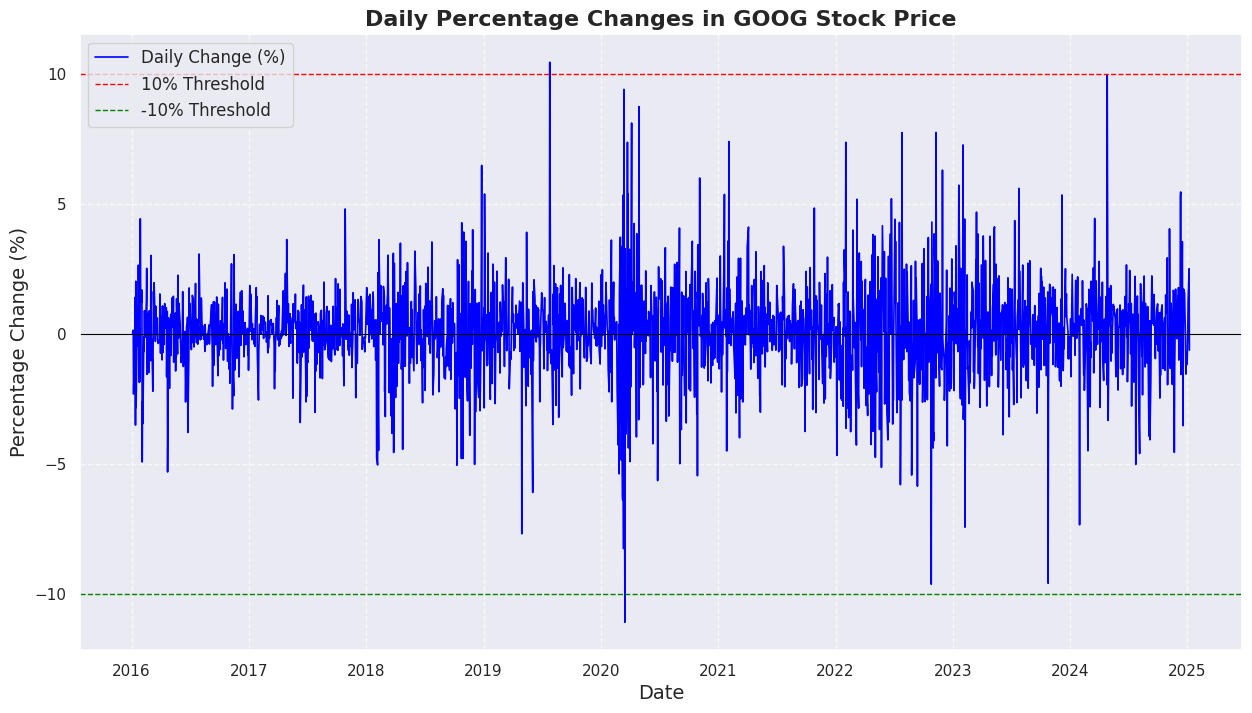

In [20]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plot daily percentage changes
ax.plot(df['daily_diff_percent'], label='Daily Change (%)', color='blue', linewidth=1.2)

# Add a horizontal line for a significant threshold (e.g., 10%)
ax.axhline(10, color='red', linestyle='--', linewidth=1, label='10% Threshold')
ax.axhline(-10, color='green', linestyle='--', linewidth=1, label='-10% Threshold')

# Add labels and title
ax.set_title('Daily Percentage Changes in GOOG Stock Price', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Percentage Change (%)', fontsize=14)

# Customize legend
ax.legend(loc='upper left', fontsize=12)

# Add grid lines for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Add zero line for reference
ax.axhline(0, color='black', linestyle='-', linewidth=0.8, label='Zero Line')

# Display the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        💡 <b>Observations:</b><br>
        <ul style="color:purple; padding-left:20px;">
            <li>The plot represents the daily percentage changes in GOOG stock price, providing a normalized view of stock volatility.</li>
            <li>The horizontal lines at +10% (red) and -10% (green) indicate thresholds for significant price movements. These may correspond to major market events, earnings reports, or broader economic impacts. 📊</li>
            <li>Most daily changes stay within ±10%, but occasional spikes reveal periods of extreme volatility, likely caused by market shocks or major announcements.</li>
            <li>Unlike absolute daily changes, this representation is scaled to the price, making it more suitable for time-series forecasting techniques such as LSTMs.</li>
        </ul>
        ✨ Using percentage changes mitigates the scaling effect of increasing stock prices and ensures that relative changes are the focus, aligning well with the requirements of LSTM models. This approach enables more consistent and interpretable predictions. 📈📉
        </font>
    </p>
</div>

<a id="Visualizing"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">5 - Visualizing📈</p>

⬆️ [Table of Contents](#c_table)

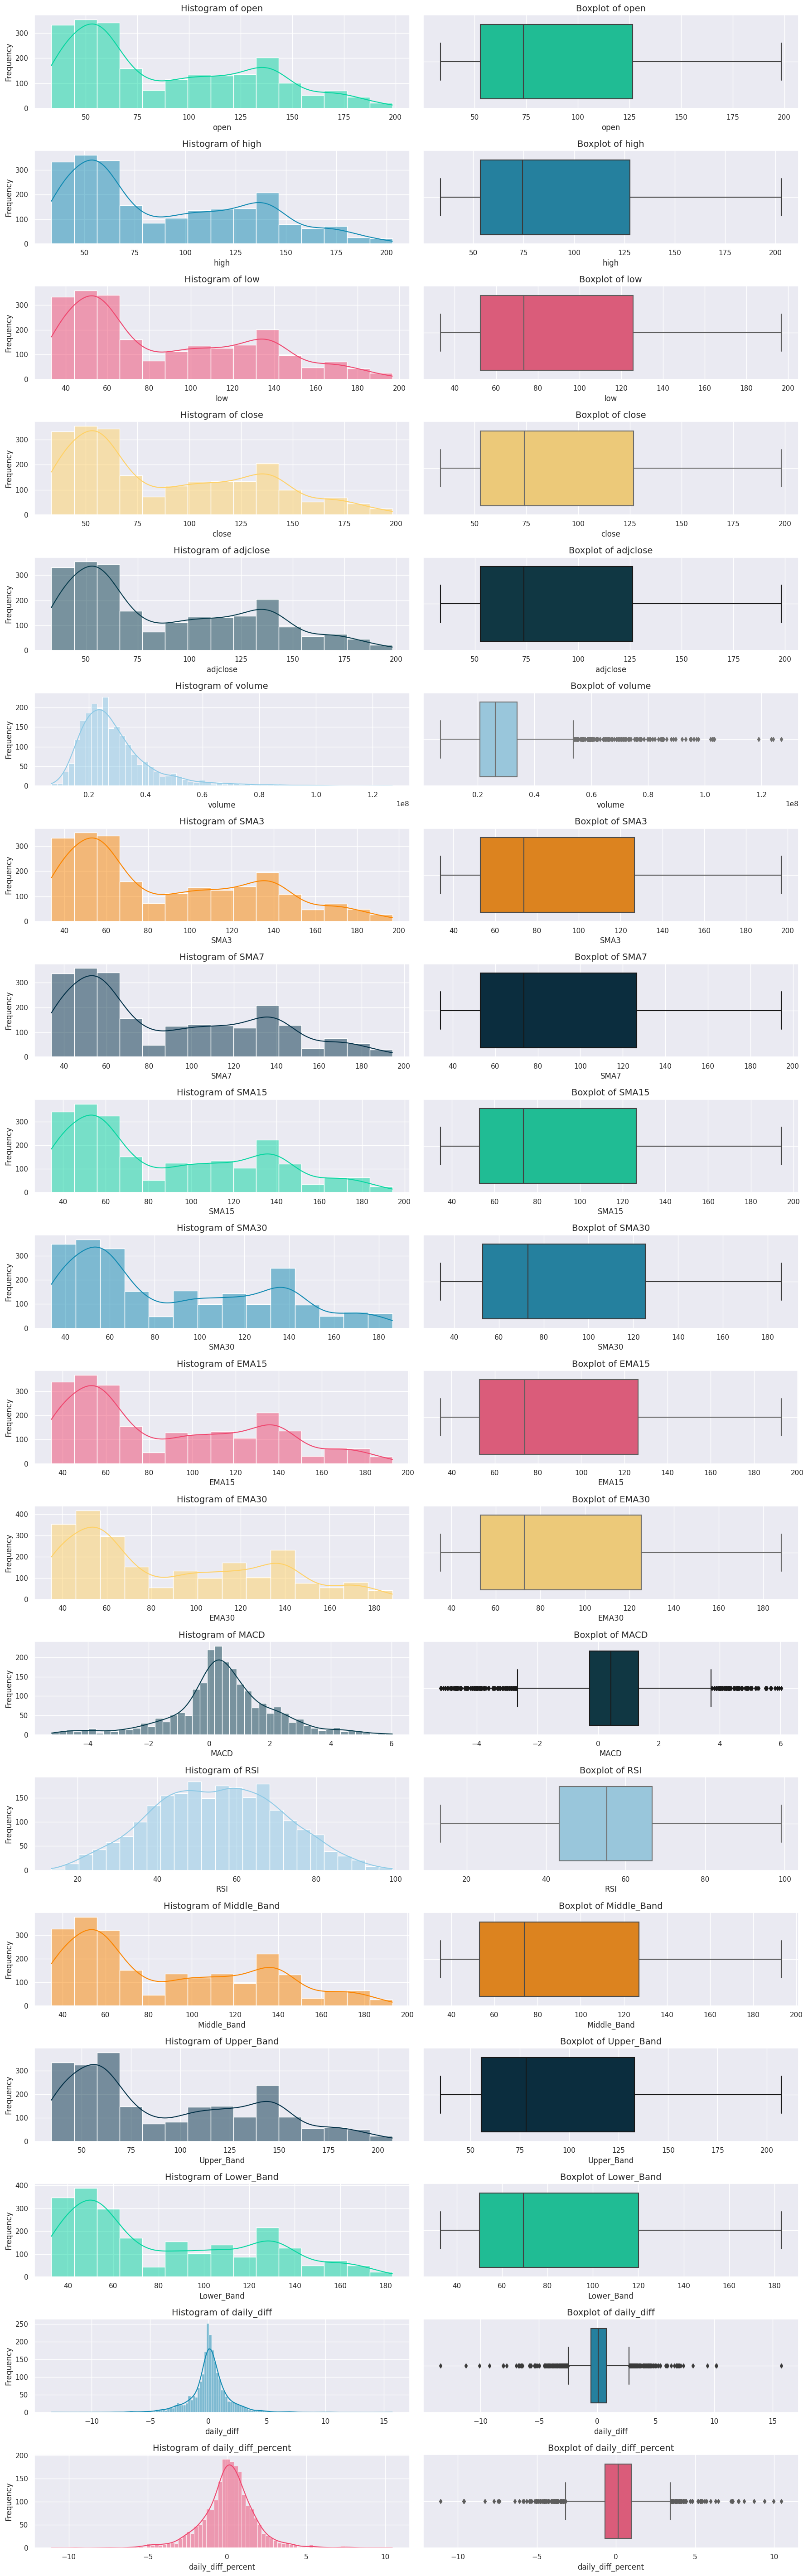

In [21]:
# Suppress warnings about future changes to Python or libraries to avoid cluttering the output
warnings.filterwarnings('ignore', category=FutureWarning)

# Define a custom palette for the visualizations
custom_palette = ['#06d6a0', '#118ab2', '#ef476f', '#ffd166', '#073b4c', '#8ecae6', '#fb8500', '#023047']

# Define a list of column names from the dataframe that we want to visualize
list_of_columns = list(df.columns)

# Create a subplot grid with 2 columns and a number of rows equal to the number of columns to visualize
fig, axs = plt.subplots(len(list_of_columns), 2, figsize=(18, len(list_of_columns) * 3))

# Loop through each column name, using 'enumerate' to get both the column name and the loop index
for i, column_name in enumerate(list_of_columns):
    # Plot a histogram for each column with dynamic color based on the palette
    sns.histplot(data=df, x=column_name, kde=True, ax=axs[i, 0], color=custom_palette[i % len(custom_palette)])
    axs[i, 0].set_title(f'Histogram of {column_name}', fontsize=14)
    axs[i, 0].set_xlabel(column_name, fontsize=12)
    axs[i, 0].set_ylabel('Frequency', fontsize=12)
    
    # Plot a boxplot for each column with the same dynamic color
    sns.boxplot(data=df, x=column_name, ax=axs[i, 1], color=custom_palette[i % len(custom_palette)])
    axs[i, 1].set_title(f'Boxplot of {column_name}', fontsize=14)
    axs[i, 1].set_xlabel(column_name, fontsize=12)
    
    # Add a grid for better readability
    axs[i, 0].grid(True)
    axs[i, 1].grid(True)

# Adjust the layout of the subplots to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

# Reset the warning filter to default
warnings.filterwarnings('default', category=FutureWarning)

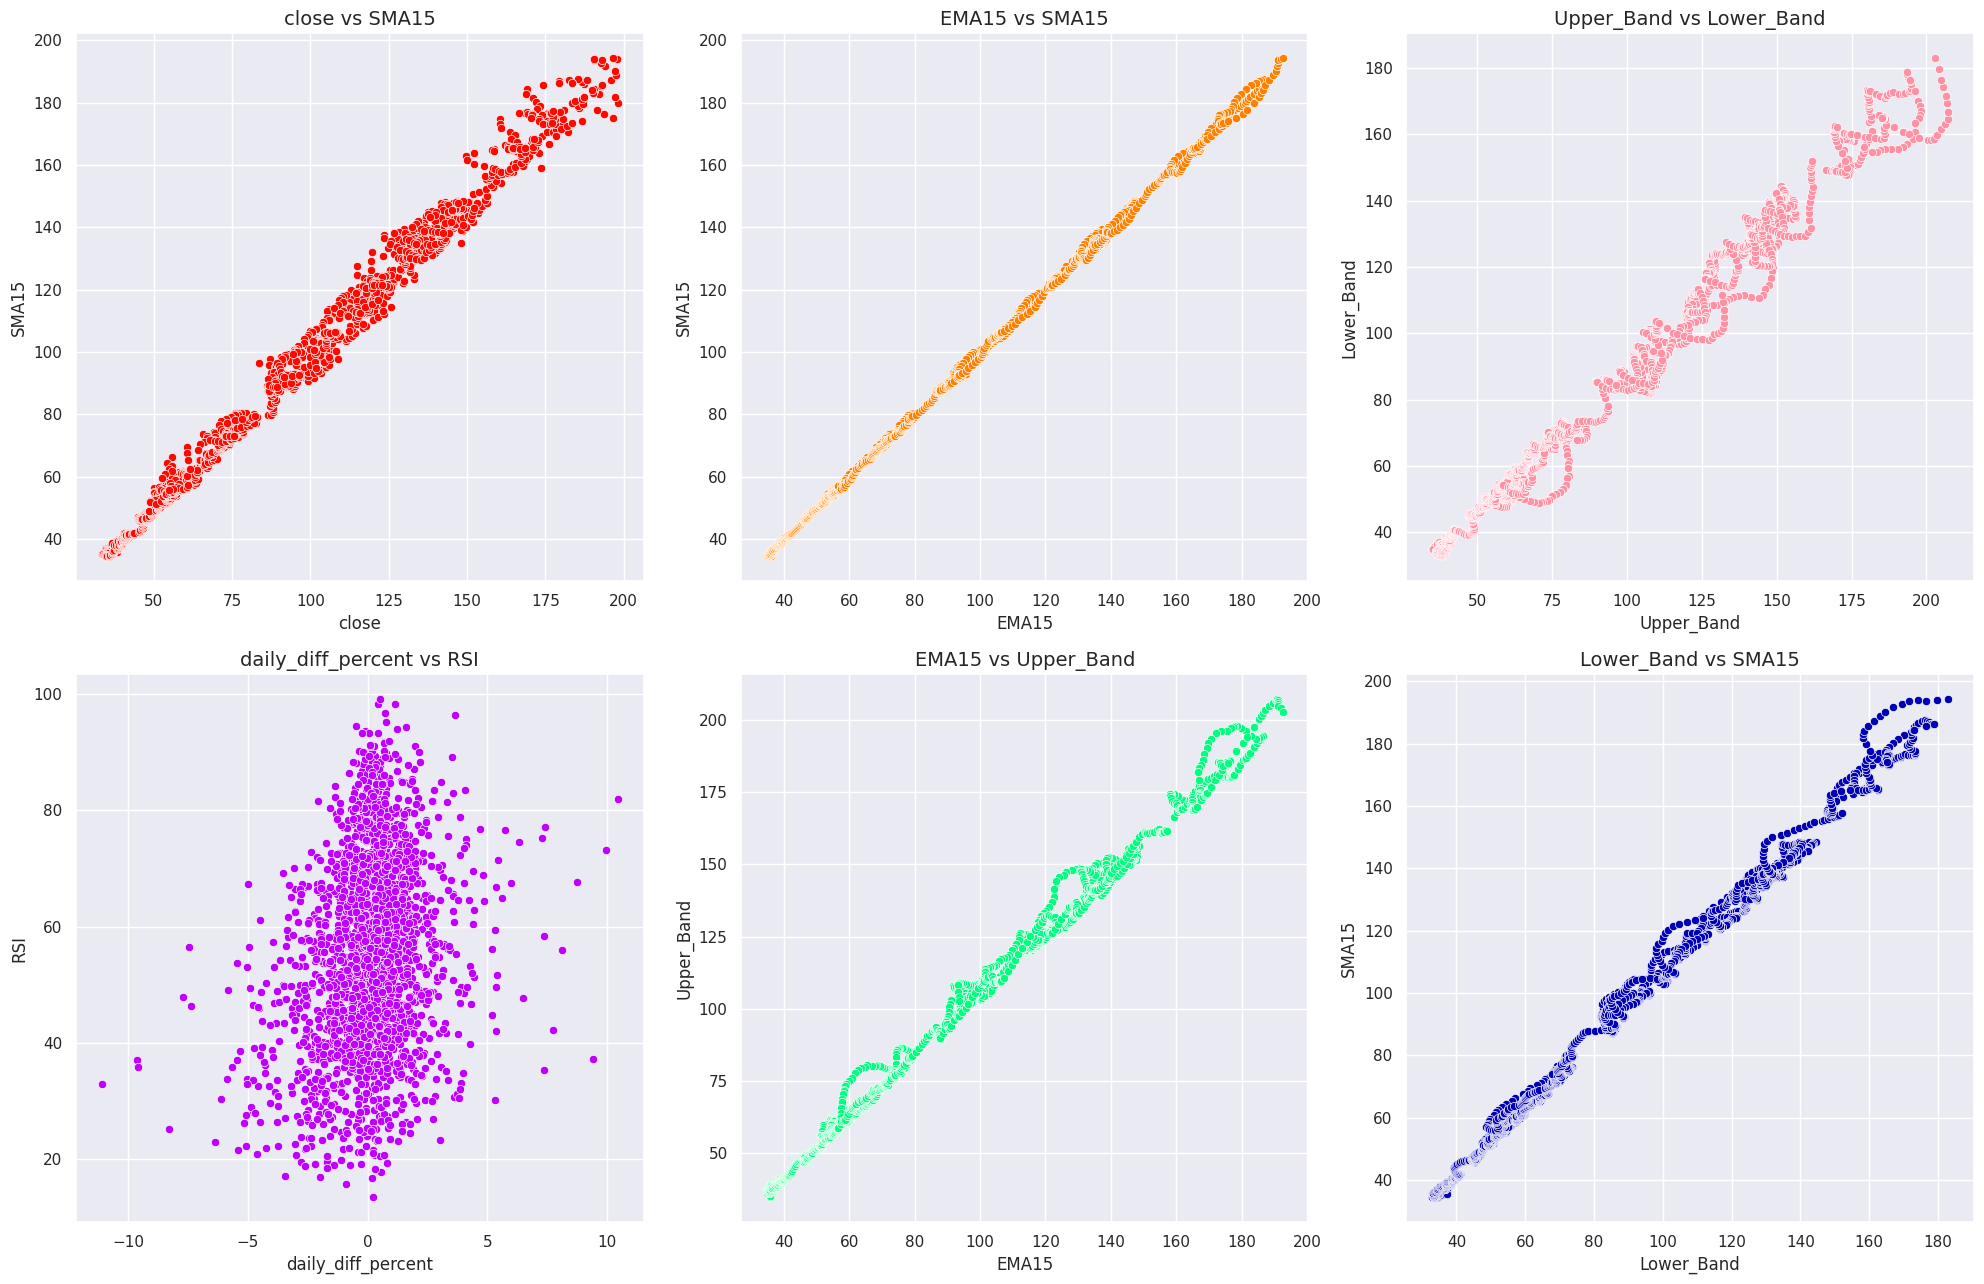

In [22]:
# Define the list of features to compare
features = ['close', 'SMA15', 'EMA15', 'RSI', 'Upper_Band', 'Lower_Band', 'daily_diff_percent']

# Define the pairs of features to plot
pairs = [
    ('close', 'SMA15'),
    ('EMA15', 'SMA15'),
    ('Upper_Band', 'Lower_Band'),
    ('daily_diff_percent', 'RSI'),
    ('EMA15', 'Upper_Band'),
    ('Lower_Band', 'SMA15')
]

# Create a 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(20, 13))

# Define a color palette for the scatter plots
colors = ['#FF0800', '#FF8000', '#FF91A4', '#BF00FF', '#00FF7F', '#0000B8']

# Loop through each pair and plot the scatter plots
for idx, (x_feature, y_feature) in enumerate(pairs):
    row, col = divmod(idx, 3)  # Calculate subplot position
    sns.scatterplot(
        x=x_feature, 
        y=y_feature, 
        data=df, 
        ax=axs[row, col], 
        color=colors[idx % len(colors)]
    )
    axs[row, col].set_title(f'{x_feature} vs {y_feature}', fontsize=14)
    axs[row, col].set_xlabel(x_feature, fontsize=12)
    axs[row, col].set_ylabel(y_feature, fontsize=12)
    axs[row, col].grid(True)

# Adjust layout for a clean look
plt.tight_layout()

# Display the plots
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        💡 <b>Observations:</b><br>
        <ul style="color:purple; padding-left:20px;">
            <li>The strong linear relationships between <b>close</b> and <b>SMA15</b>, as well as <b>EMA15</b> and <b>SMA15</b>, indicate that both moving averages closely follow the stock's closing price trends.</li>
            <li>The correlation between <b>Upper_Band</b> and <b>Lower_Band</b> highlights how Bollinger Bands expand and contract in unison, based on market volatility.</li>
            <li>The distribution of points in the <b>daily_diff_percent</b> vs. <b>RSI</b> plot shows no clear linear relationship, suggesting independent behavior between these metrics. However, clusters near certain RSI levels might indicate overbought or oversold conditions.</li>
            <li>The relationship between <b>EMA15</b> and <b>Upper_Band</b> reflects a general alignment, with the EMA acting as a smoothing factor while staying within Bollinger Band constraints.</li>
            <li>The scatter between <b>Lower_Band</b> and <b>SMA15</b> confirms the role of the SMA as the centerline for Bollinger Bands.</li>
        </ul>
        ✨ These plots emphasize the interplay between trend indicators (SMA, EMA), volatility measures (Bollinger Bands), and oscillators (RSI), providing a comprehensive view of market dynamics. 📈📉
        </font>
    </p>
</div>


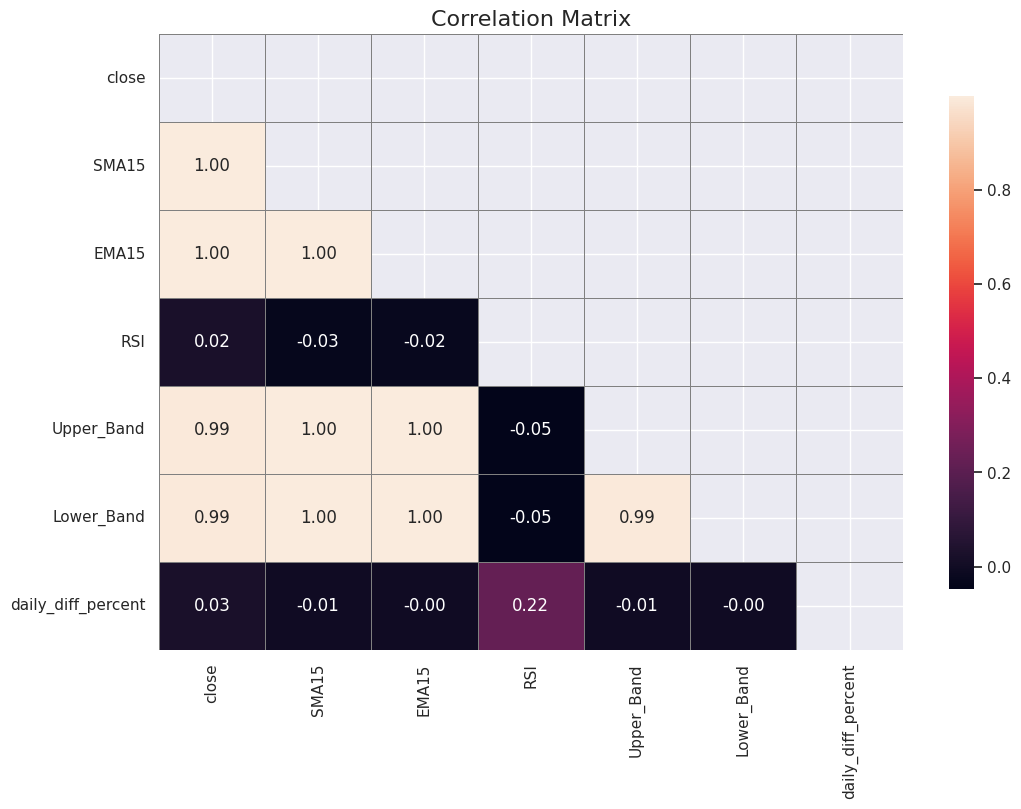

In [23]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df[['close', 'SMA15', 'EMA15', 'RSI', 'Upper_Band', 'Lower_Band', 'daily_diff_percent']].corr()

# Initialize a new figure with a specified figure size
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
            mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)),
            linewidths=0.5, linecolor='gray', cbar_kws={'shrink': 0.8})

# Set the title of the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Display the figure
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        💡 <b>Observations:</b><br>
        <ul style="color:purple; padding-left:20px;">
            <li>The correlation matrix shows near-perfect correlations between <b>close</b>, <b>SMA15</b>, <b>EMA15</b>, <b>Upper_Band</b>, and <b>Lower_Band</b>, highlighting redundancy among these features.</li>
            <li>The weak correlation between <b>RSI</b> and other features (e.g., <b>close</b>, <b>SMA15</b>) indicates that RSI operates independently as an oscillator and is not directly tied to price trends.</li>
            <li>The negligible correlations involving <b>daily_diff_percent</b> suggest it does not strongly interact with other indicators in the dataset, limiting its predictive utility.</li>
            <li>The high correlation among <b>SMA15</b>, <b>EMA15</b>, and Bollinger Bands indicates these metrics are derived from similar price movements, adding little new information.</li>
        </ul>
        ✨ This correlation matrix provides limited new insights due to high redundancy among trend-based indicators and weak relationships with independent metrics like <b>RSI</b> and <b>daily_diff_percent</b>. 📊📉
        </font>
    </p>
</div>

<a id="RNN"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">6 - RNN (LSTM)📊</p>

⬆️ [Table of Contents](#c_table)

<a id="close"></a>
## <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">6.1 - <span style="color:steelblue;font-weight:bold">close only 📈
    
⬆️ [Section](#RNN)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        <ul style="color:purple; padding-left:20px;">
            <li>We are modeling the data using an RNN architecture, specifically an LSTM network, which is well-suited for sequential and time-series data.</li>
            <li>For evaluation purposes, the dataset has been split, with the <b>last ten days</b> designated as the test set to assess the model's performance on unseen data.</li>
        </font>
    </p>
</div>

In [24]:
training_df = df[:-10]
test_df = df[-10:]

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
            For the first model, we are going to use <b>close values only</b> for prediction. We will approach the prediction process in two possible ways: <br><br>
            1. In the first approach, we will feed the test set directly to the model for predictions. <br>
            2. In the second approach, we will make the first close price prediction, add it to the sequence, and iteratively predict the subsequent close prices based on the updated sequence.
        </font>
    </p>
</div>

In [25]:
close_prices = training_df['close'].values

scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))

sequence_length = 180
X, y = [], []
for i in range(len(close_prices_scaled) - sequence_length):
    X.append(close_prices_scaled[i:i + sequence_length])
    y.append(close_prices_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)

In [26]:
model = Sequential([
    Input(shape=(X.shape[1], 1)),
    LSTM(256, return_sequences=True),
    LSTM(128),
    Dense(64, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 180, 256)            │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 469,633 (1.79 MB)

 Trainable params: 469,633 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        mode='min'
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001
    )
]

In [28]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=callbacks)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0180 - mae: 0.0800 - mape: 37.1385 - val_loss: 0.0019 - val_mae: 0.0354 - val_mape: 4.8495 - learning_rate: 0.0010
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.2618e-04 - mae: 0.0148 - mape: 7.1986 - val_loss: 0.0042 - val_mae: 0.0566 - val_mape: 7.7627 - learning_rate: 0.0010
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.7055e-04 - mae: 0.0153 - mape: 6.8018 - val_loss: 0.0010 - val_mae: 0.0240 - val_mape: 3.4442 - learning_rate: 0.0010
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.0855e-04 - mae: 0.0143 - mape: 6.2856 - val_loss: 0.0014 - val_mae: 0.0298 - val_mape: 4.1316 - learning_rate: 0.0010
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.2767e-04 - mae: 0.0127 - mape: 5.7909 - val_loss: 9.1913e-04 - val_mae: 0.0228 - val_mape: 3.2580 - learning_rate: 0.0010
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.6125e-04 - mae: 0.0135 - mape: 6.0546

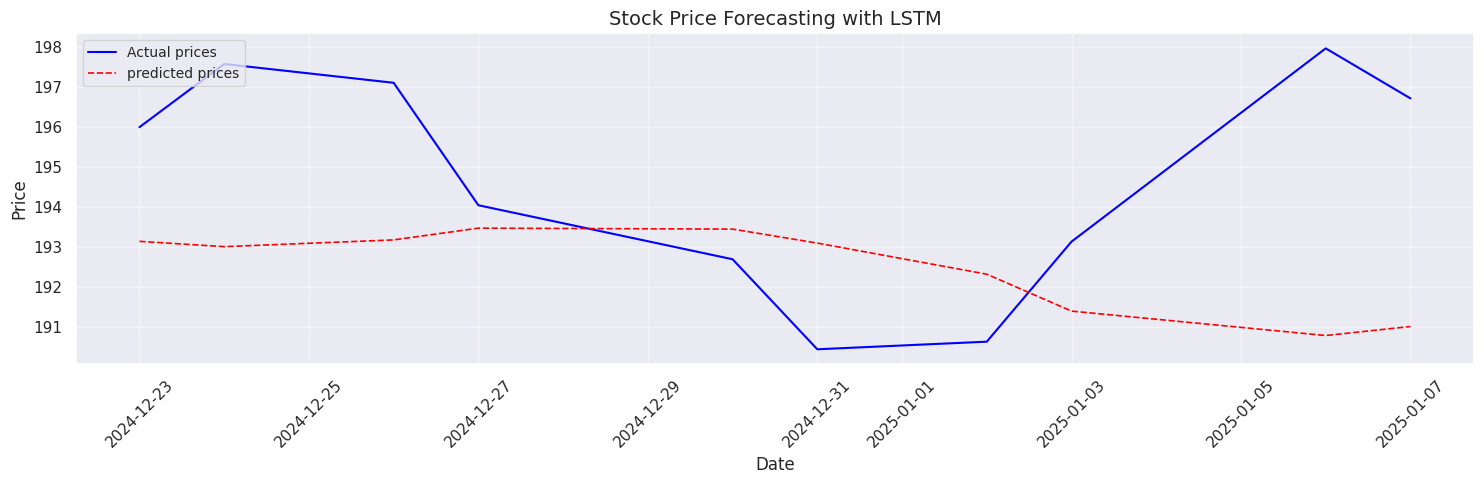

In [29]:
testing = pd.concat([training_df[-sequence_length:], test_df])
testing_close_prices = testing['close'].values

testing_close_prices_scaled = scaler.transform(testing_close_prices.reshape(-1, 1))

sequence_length = 180
X_test, y_test = [], []
for i in range(len(testing_close_prices_scaled) - sequence_length):
    X_test.append(testing_close_prices_scaled[i:i + sequence_length])
    y_test.append(testing_close_prices_scaled[i + sequence_length])

X_test, y_test = np.array(X_test), np.array(y_test)

test_sequences = X_test.reshape(10, sequence_length, 1)
test_predictions = model.predict(test_sequences, verbose=0)
test_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))
result_df = pd.DataFrame(test_df['close'])
result_df['predictions'] = test_predictions
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(result_df['close'], label='Actual prices', color='blue', linewidth=1.5)
ax.plot(result_df['predictions'], label='predicted prices', linestyle='--', color='red', linewidth=1.2)

ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
ax.set_title("Stock Price Forecasting with LSTM", fontsize=14)
ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.5)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
        💡 <b>Model Insight:</b><br>
        <ul style="color:maroon; padding-left:20px;">
            <li>The model shows signs of <b>overfitting</b> by closely following the previous day's close prices.</li>
            <li>Predictions lack generalization, mirroring trends without capturing broader market patterns.</li>
        </font>
    </p>
</div>


In [30]:
# Initialize the sequence for predictions
sequence = close_prices_scaled[-sequence_length:]
predicted_prices = []  # Store all predicted prices

# Predict iteratively for 10 days
for _ in range(10):
    # Ensure the shape of sequence is correct (1, sequence_length, 1)
    sequence = sequence.reshape(1, sequence_length, 1)
    
    # Predict the next price
    next_price_scaled = model.predict(sequence, verbose=0)
    
    # Append the prediction to the list of predicted prices
    predicted_prices.append(next_price_scaled[0, 0])
    
    # Update the sequence: remove the first element and add the predicted price
    sequence = np.append(sequence[:, 1:, :], [next_price_scaled], axis=1)

# Reverse the scaling for all predicted prices
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))
test_results_df = pd.DataFrame(test_df['close'])
test_results_df['predicted prices'] = predicted_prices.flatten()
# Print the final results
print("Predicted prices for the next 10 days:")
display(test_results_df)

Predicted prices for the next 10 days:


,close,predicted prices
2024-12-23,195.990005,193.137589
2024-12-24,197.570007,192.669739
2024-12-26,197.100006,192.106827
2024-12-27,194.039993,191.482529
2024-12-30,192.690002,190.838272
2024-12-31,190.440002,190.198959
2025-01-02,190.630005,189.572662
2025-01-03,193.130005,188.963303
2025-01-06,197.960007,188.372620
2025-01-07,196.710007,187.801208


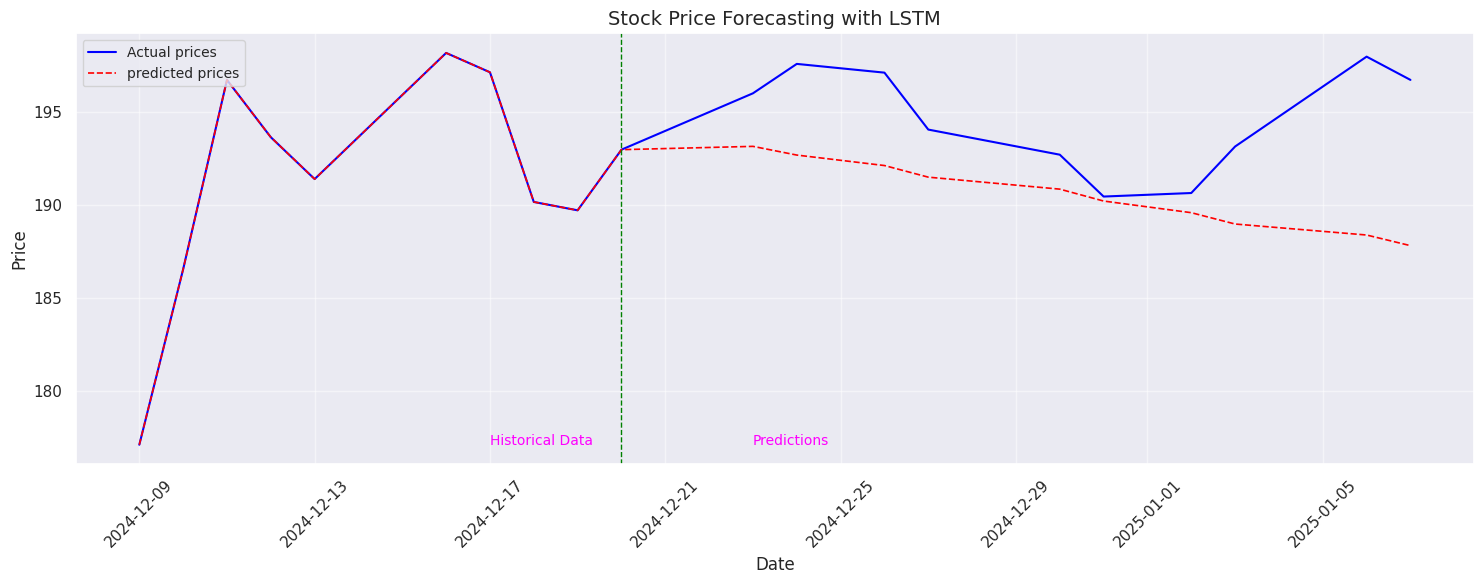

In [31]:
#seq_plot = scaler.inverse_transform(np.array(sequence[:,-20:]).reshape(-1, 1))
training_data_df = pd.DataFrame(training_df['close'].iloc[-10:])
training_data_df['predicted prices'] = training_df['close'].iloc[-10:]
result_df = pd.concat([training_data_df, test_results_df])
result_df_min = result_df.min().min()
all_results = result_df.copy()
fig, ax = plt.subplots(figsize=(15, 6))

# Main plot
ax.plot(result_df['close'], label='Actual prices', color='blue', linewidth=1.5)
ax.plot(result_df['predicted prices'], label='predicted prices', linestyle='--', color='red', linewidth=1.2)

# Labels and title
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
ax.set_title("Stock Price Forecasting with LSTM", fontsize=14)
ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.5)

plt.axvline(pd.Timestamp(result_df.index[9]), color='green', linestyle='--', linewidth=1, label='predictions start')

# Add text annotations
plt.text(pd.Timestamp(result_df.index[6]), result_df_min, 'Historical Data', fontsize=10, color='magenta')
plt.text(pd.Timestamp(result_df.index[10]), result_df_min, 'Predictions', fontsize=10, color='magenta')

plt.xticks(rotation=45)
plt.tight_layout()
# Display the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
            - The <b>blue line</b> represents the actual stock prices, and the <b>red dashed line</b> represents the predicted prices.<br>
            - In the prediction phase, the model shows a slight divergence, as the predicted prices follow a smoother trend, failing to fully capture the volatility of actual prices.<br>
            - This behavior indicates the model's limitations in predicting sharp fluctuations and highlights room for improvement in feature engineering or model optimization.<br>
            - It is evident that the model is overfitted to close column, We are going to add some indicators to prevent overfitting.<br>
        </font>
    </p>
</div>

<a id="indicators_close"></a>
## <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">6.2 - <span style="color:steelblue;font-weight:bold">close with indicators 📈
    
⬆️ [Section](#RNN)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
            To prevent overfitting to the close price data, we will incorporate additional technical indicators along with the close price. These indicators provide complementary information about market trends and volatility, helping the model generalize better. The selected features are:<br>
            - <b>close</b>: The closing price of the stock.<br>
            - <b>SMA7</b>: Simple Moving Average over 7 days.<br>
            - <b>SMA30</b>: Simple Moving Average over 30 days.<br>
            - <b>EMA15</b>: Exponential Moving Average over 15 days.<br>
            - <b>Upper_Band</b>: Upper Bollinger Band.<br>
            - <b>Lower_Band</b>: Lower Bollinger Band.<br>
            - <b>RSI</b>: Relative Strength Index.<br>
            By including these indicators, we aim to capture a broader range of market dynamics and improve the robustness of our predictions.
        </font>
    </p>
</div>

In [32]:
indicators_close_df = training_df[['close', 'SMA7', 'SMA30', 'EMA15', 'Upper_Band', 'Lower_Band', 'RSI']].copy()

indicator_scaler = MinMaxScaler(feature_range=(0, 1))
indicators_close_scaled = indicator_scaler.fit_transform(indicators_close_df)

sequence_length = 180
X, y = [], []
for i in range(len(indicators_close_scaled) - sequence_length):
    X.append(indicators_close_scaled[i:i + sequence_length])
    y.append(indicators_close_scaled[i + sequence_length, 0])

X, y = np.array(X), np.array(y)

In [33]:
model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),
    LSTM(256, return_sequences=True),
    LSTM(128),
    Dense(64, activation='relu'),
    Dense(1) 
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 180, 256)            │         270,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 475,777 (1.81 MB)

 Trainable params: 475,777 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        mode='min'
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001
    )
]

In [35]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=callbacks)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0163 - mae: 0.0707 - mape: 34.1317 - val_loss: 0.0047 - val_mae: 0.0582 - val_mape: 7.9013 - learning_rate: 0.0010
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.0464e-04 - mae: 0.0159 - mape: 7.6699 - val_loss: 0.0019 - val_mae: 0.0341 - val_mape: 4.6422 - learning_rate: 0.0010
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.7962e-04 - mae: 0.0157 - mape: 7.3249 - val_loss: 0.0016 - val_mae: 0.0307 - val_mape: 4.1705 - learning_rate: 0.0010
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.5670e-04 - mae: 0.0138 - mape: 6.7716 - val_loss: 0.0021 - val_mae: 0.0376 - val_mape: 5.1075 - learning_rate: 0.0010
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.4142e-04 - mae: 0.0135 - mape: 6.8111 - val_loss: 0.0016 - val_mae: 0.0319 - val_mape: 4.3438 - learning_rate: 0.0010
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.9968e-04 - mae: 0.0142 - mape: 7.0634 - v

In [36]:
# Initialize the sequence for predictions
sequence = indicators_close_scaled[-sequence_length:]
predicted_prices = []  # Store all predicted prices

# Extract the close prices for recalculating indicators
previous_closes = pd.Series(training_df['close'].values[-30:])  # Use the last 30 days of close prices

# Predict iteratively for 10 days
for _ in range(10):
    # Ensure the shape of the sequence is correct: (1, sequence_length, features)
    sequence = sequence.reshape(1, sequence_length, 7)
    
    # Predict the next price (scaled)
    next_price_scaled = model.predict(sequence, verbose=0)
    
    # Inverse transform the scaled prediction to get the real-world price
    next_price = scaler.inverse_transform([[next_price_scaled[0, 0]]])[0, 0]
    predicted_prices.append(next_price)
    
    # Update the close prices for recalculating indicators
    previous_closes = pd.concat([previous_closes, pd.Series([next_price])], ignore_index=True)
    
    # Recalculate indicators dynamically
    new_sma7 = previous_closes.rolling(window=7).mean().iloc[-1]
    new_sma30 = previous_closes.rolling(window=30).mean().iloc[-1]
    new_ema15 = previous_closes.ewm(span=15, adjust=False).mean().iloc[-1]
    new_upper_band = new_sma7 + (2 * previous_closes.rolling(window=7).std().iloc[-1])
    new_lower_band = new_sma7 - (2 * previous_closes.rolling(window=7).std().iloc[-1])
    new_rsi = 100 - (100 / (1 + (previous_closes.diff().clip(lower=0).mean() /
                                 -previous_closes.diff().clip(upper=0).mean())))
    
    # Create the new row of scaled features
    new_row = np.array([next_price, new_sma7, new_sma30, new_ema15, new_upper_band, new_lower_band, new_rsi])
    
    # Convert the new row into a DataFrame with the same column names as the original DataFrame
    new_row_df = pd.DataFrame([new_row], columns=indicators_close_df.columns)
    
    # Scale the new row
    new_row_scaled = indicator_scaler.transform(new_row_df).flatten()
    
    # Update the sequence: remove the first timestep and append the new row
    sequence = np.append(sequence[:, 1:, :], new_row_scaled.reshape(1, 1, -1), axis=1)

# Reverse the scaling for all predicted prices
predicted_prices = pd.Series(predicted_prices, name="Predicted Prices")
test_results_df = pd.DataFrame(test_df['close'])
test_results_df = test_results_df.assign(predicted_prices=predicted_prices.values)

# Display the results
print("Predicted prices for the next 10 days:")
display(test_results_df)

Predicted prices for the next 10 days:


,close,predicted_prices
2024-12-23,195.990005,184.622122
2024-12-24,197.570007,182.726127
2024-12-26,197.100006,181.976787
2024-12-27,194.039993,181.846028
2024-12-30,192.690002,182.079137
2024-12-31,190.440002,182.508562
2025-01-02,190.630005,182.936367
2025-01-03,193.130005,183.366793
2025-01-06,197.960007,183.732233
2025-01-07,196.710007,184.004238


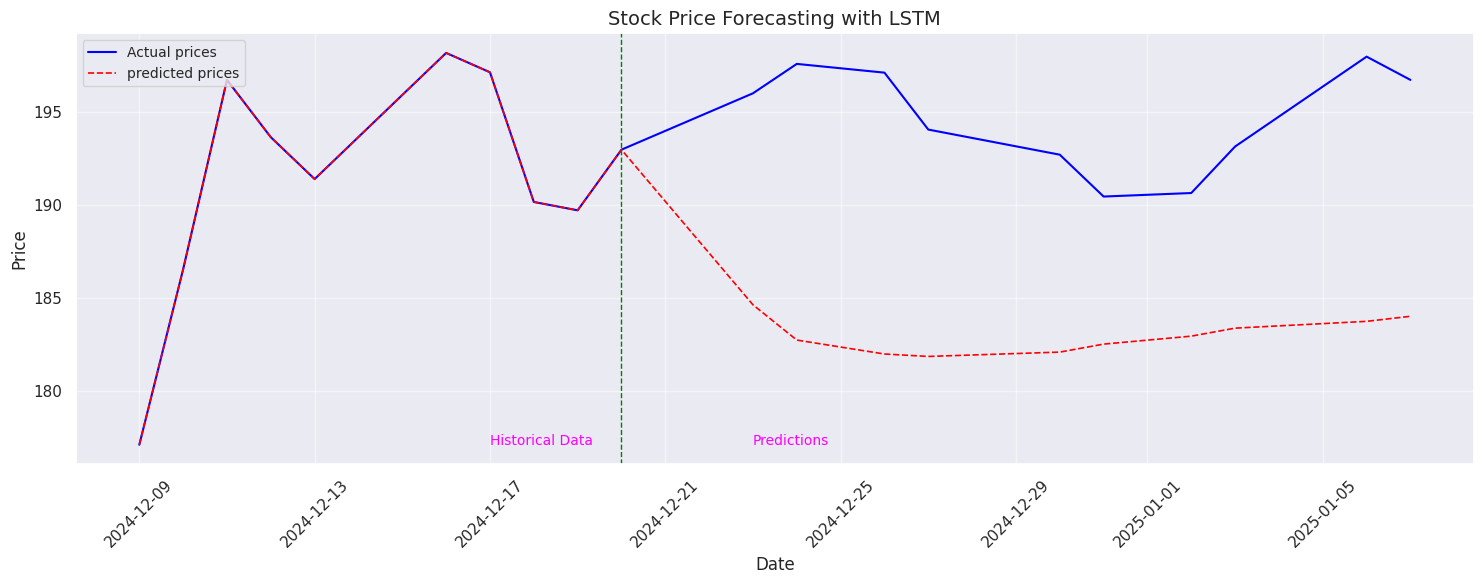

In [37]:
#seq_plot = scaler.inverse_transform(np.array(sequence[:,-20:]).reshape(-1, 1))
training_data_df = pd.DataFrame(training_df['close'].iloc[-10:])
training_data_df['predicted_prices'] = training_df['close'].iloc[-10:]
result_df = pd.concat([training_data_df, test_results_df])
result_df_min = result_df.min().min()
all_results['close with indicators'] = result_df['predicted_prices']
fig, ax = plt.subplots(figsize=(15, 6))

# Main plot
ax.plot(result_df['close'], label='Actual prices', color='blue', linewidth=1.5)
ax.plot(result_df['predicted_prices'], label='predicted prices', linestyle='--', color='red', linewidth=1.2)

# Labels and title
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
ax.set_title("Stock Price Forecasting with LSTM", fontsize=14)
ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.5)

plt.axvline(pd.Timestamp(result_df.index[9]), color='green', linestyle='--', linewidth=1, label='predictions start')

# Add text annotations
plt.text(pd.Timestamp(result_df.index[6]), result_df_min, 'Historical Data', fontsize=10, color='magenta')
plt.text(pd.Timestamp(result_df.index[10]), result_df_min, 'Predictions', fontsize=10, color='magenta')

plt.xticks(rotation=45)
plt.tight_layout()
# Display the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
            - Once again, the results are not very promising, and there is clear evidence of overfitting to the close data.<br>
        </font>
    </p>
</div>

<a id="indicators_close_excluded"></a>
## <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">6.3 - <span style="color:steelblue;font-weight:bold">indicators without close  📈
    
⬆️ [Section](#RNN)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
            - To address the issue of overfitting to the close data, we will exclude the close prices from the input features that are fed to the model.<br>
            - Instead, the close prices will only be used as the target values for predictions.<br>
            - By removing close data from the input features, the model will focus on learning patterns from the additional indicators, which will reduce dependency on a single feature and improve generalization.<br>
            - This approach aims to create a more robust model capable of capturing broader trends and dynamics in the stock price movements.
        </font>
    </p>
</div>


In [38]:
close_excluded_df = training_df[['SMA7', 'SMA30', 'EMA15', 'Upper_Band', 'Lower_Band', 'RSI']].copy()
close_prices = training_df['close'].values

scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))

indicator_scaler = MinMaxScaler(feature_range=(0, 1))
close_excluded_scaled = indicator_scaler.fit_transform(close_excluded_df)

sequence_length = 180
X, y = [], []
for i in range(len(close_excluded_scaled) - sequence_length):
    X.append(close_excluded_scaled[i:i + sequence_length])
    y.append(close_prices_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)

In [39]:
model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),
    LSTM(256, return_sequences=True),
    LSTM(128),
    Dense(64, activation='relu'),
    Dense(1) 
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 180, 256)            │         269,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 474,753 (1.81 MB)

 Trainable params: 474,753 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        mode='min'
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001
    )
]

In [41]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=callbacks)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0164 - mae: 0.0823 - mape: 40.3657 - val_loss: 0.0067 - val_mae: 0.0680 - val_mape: 8.9717 - learning_rate: 0.0010
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.8341e-04 - mae: 0.0169 - mape: 7.6883 - val_loss: 0.0040 - val_mae: 0.0524 - val_mape: 7.0237 - learning_rate: 0.0010
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.0614e-04 - mae: 0.0167 - mape: 8.2829 - val_loss: 0.0029 - val_mae: 0.0439 - val_mape: 5.9114 - learning_rate: 0.0010
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.7906e-04 - mae: 0.0145 - mape: 7.2523 - val_loss: 0.0032 - val_mae: 0.0469 - val_mape: 6.3480 - learning_rate: 0.0010
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 3.6958e-04 - mae: 0.0142 - mape: 7.1116 - val_loss: 0.0033 - val_mae: 0.0477 - val_mape: 6.4457 - learning_rate: 0.0010
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.6308e-04 - mae: 0.0136 - mape: 6.5124 - v

In [42]:
# Initialize the sequence for predictions
sequence = close_excluded_scaled[-sequence_length:]
predicted_prices = []  # Store all predicted prices

# Extract the close prices for recalculating indicators
previous_closes = pd.Series(training_df['close'].values[-30:])  # Use the last 30 days of close prices

# Predict iteratively for 10 days
for _ in range(10):
    # Ensure the shape of the sequence is correct: (1, sequence_length, features)
    sequence = sequence.reshape(1, sequence_length, 6)
    
    # Predict the next price (scaled)
    next_price_scaled = model.predict(sequence, verbose=0)
    
    # Inverse transform the scaled prediction to get the real-world price
    next_price = scaler.inverse_transform([[next_price_scaled[0, 0]]])[0, 0]
    predicted_prices.append(next_price)
    
    # Update the close prices for recalculating indicators
    previous_closes = pd.concat([previous_closes, pd.Series([next_price])], ignore_index=True)
    
    # Recalculate indicators dynamically
    new_sma7 = previous_closes.rolling(window=7).mean().iloc[-1]
    new_sma30 = previous_closes.rolling(window=30).mean().iloc[-1]
    new_ema15 = previous_closes.ewm(span=15, adjust=False).mean().iloc[-1]
    new_upper_band = new_sma7 + (2 * previous_closes.rolling(window=7).std().iloc[-1])
    new_lower_band = new_sma7 - (2 * previous_closes.rolling(window=7).std().iloc[-1])
    new_rsi = 100 - (100 / (1 + (previous_closes.diff().clip(lower=0).mean() /
                                 -previous_closes.diff().clip(upper=0).mean())))
    
    # Create the new row of scaled features
    new_row = np.array([new_sma7, new_sma30, new_ema15, new_upper_band, new_lower_band, new_rsi])
    
    # Convert the new row into a DataFrame with the same column names as the original DataFrame
    new_row_df = pd.DataFrame([new_row], columns=close_excluded_df.columns)
    
    # Scale the new row
    new_row_scaled = indicator_scaler.transform(new_row_df).flatten()
    
    # Update the sequence: remove the first timestep and append the new row
    sequence = np.append(sequence[:, 1:, :], new_row_scaled.reshape(1, 1, -1), axis=1)

# Reverse the scaling for all predicted prices
predicted_prices = pd.Series(predicted_prices, name="Predicted Prices")
test_results_df = pd.DataFrame(test_df['close'])
test_results_df = test_results_df.assign(predicted_prices=predicted_prices.values)

# Display the results
print("Predicted prices for the next 10 days:")
display(test_results_df)

Predicted prices for the next 10 days:


,close,predicted_prices
2024-12-23,195.990005,182.343385
2024-12-24,197.570007,180.563449
2024-12-26,197.100006,179.316889
2024-12-27,194.039993,178.633940
2024-12-30,192.690002,178.366510
2024-12-31,190.440002,178.342197
2025-01-02,190.630005,178.407468
2025-01-03,193.130005,178.500578
2025-01-06,197.960007,178.590114
2025-01-07,196.710007,178.659441


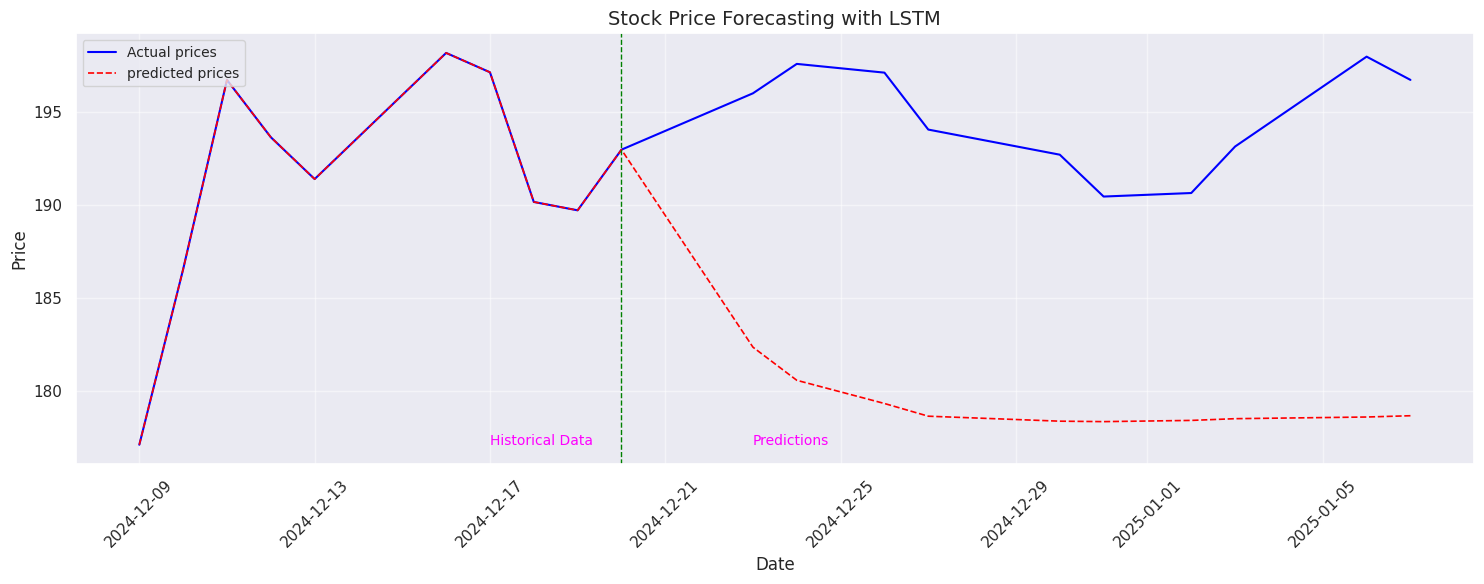

In [43]:
#seq_plot = scaler.inverse_transform(np.array(sequence[:,-20:]).reshape(-1, 1))
training_data_df = pd.DataFrame(training_df['close'].iloc[-10:])
training_data_df['predicted_prices'] = training_df['close'].iloc[-10:]
result_df = pd.concat([training_data_df, test_results_df])
result_df_min = result_df.min().min()
all_results['indicators without close'] = result_df['predicted_prices']
fig, ax = plt.subplots(figsize=(15, 6))

# Main plot
ax.plot(result_df['close'], label='Actual prices', color='blue', linewidth=1.5)
ax.plot(result_df['predicted_prices'], label='predicted prices', linestyle='--', color='red', linewidth=1.2)

# Labels and title
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
ax.set_title("Stock Price Forecasting with LSTM", fontsize=14)
ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.5)

plt.axvline(pd.Timestamp(result_df.index[9]), color='green', linestyle='--', linewidth=1, label='predictions start')

# Add text annotations
plt.text(pd.Timestamp(result_df.index[6]), result_df_min, 'Historical Data', fontsize=10, color='magenta')
plt.text(pd.Timestamp(result_df.index[10]), result_df_min, 'Predictions', fontsize=10, color='magenta')

plt.xticks(rotation=45)
plt.tight_layout()
# Display the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
            - The exclusion of close data from the input features results in a model that exhibits more pronounced volatility and fluctuations in its predictions.<br>
            - This approach enables the model to rely more heavily on derived indicators, such as moving averages and RSI, which provide additional context to price movements.<br>
        </font>
    </p>
</div>


<a id="indicators_diff"></a>
## <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">6.4 - <span style="color:steelblue;font-weight:bold">indicators with daily diff  📈
    
⬆️ [Section](#RNN)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
            - The current model has shown improvement in capturing fluctuations by excluding the close data from the input features.<br>
            - However, to explore further refinements, we are now going to replace the close data with <b>daily_diff_percent</b>, which represents the percentage change in price compared to the previous day.<br>
            - The rationale behind this approach is to provide the model with a normalized measure of price movement rather than absolute values, allowing it to better detect trends and patterns.<br>
        </font>
    </p>
</div>


In [44]:
indicators_diff_df = training_df[['daily_diff_percent', 'SMA7', 'SMA30', 'EMA15', 'Upper_Band', 'Lower_Band', 'RSI']].copy()

diff_scaler = MinMaxScaler(feature_range=(0, 1))
diff_scaled = diff_scaler.fit_transform(indicators_diff_df['daily_diff_percent'].values.reshape(-1, 1))

indicator_scaler = MinMaxScaler(feature_range=(0, 1))
indicators_diff_scaled = indicator_scaler.fit_transform(indicators_diff_df)

sequence_length = 180
X, y = [], []
for i in range(len(indicators_diff_scaled) - sequence_length):
    X.append(indicators_diff_scaled[i:i + sequence_length])
    y.append(indicators_diff_scaled[i + sequence_length, 0])

X, y = np.array(X), np.array(y)

In [45]:
model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),
    LSTM(256, return_sequences=True),
    LSTM(128),
    Dense(64, activation='relu'),
    Dense(1) 
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 180, 256)            │         270,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 475,777 (1.81 MB)

 Trainable params: 475,777 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        mode='min'
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001
    )
]

In [47]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=callbacks)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0644 - mae: 0.1790 - mape: 392647.5312 - val_loss: 0.0071 - val_mae: 0.0593 - val_mape: 13.9604 - learning_rate: 0.0010
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0080 - mae: 0.0624 - mape: 295664.7812 - val_loss: 0.0065 - val_mae: 0.0572 - val_mape: 13.1900 - learning_rate: 0.0010
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0077 - mae: 0.0613 - mape: 631809.3750 - val_loss: 0.0065 - val_mae: 0.0589 - val_mape: 13.2517 - learning_rate: 0.0010
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0077 - mae: 0.0621 - mape: 856180.8750 - val_loss: 0.0076 - val_mae: 0.0620 - val_mape: 14.8606 - learning_rate: 0.0010
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0080 - mae: 0.0629 - mape: 791898.4375 - val_loss: 0.0115 - val_mae: 0.0867 - val_mape: 17.1442 - learning_rate: 0.0010
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0085 - mae: 0.0666 - mape: 2

In [48]:
# Initialize the sequence for predictions
sequence = indicators_diff_scaled[-sequence_length:]
predicted_prices = []  # Store all predicted prices

# Extract the close prices for recalculating indicators
previous_closes = pd.Series(training_df['close'].values[-30:])  # Use the last 30 days of close prices

# Predict iteratively for 10 days
for _ in range(10):
    # Ensure the shape of the sequence is correct: (1, sequence_length, features)
    sequence = sequence.reshape(1, sequence_length, 7)
    
    # Predict the next price (scaled)
    next_diff_scaled = model.predict(sequence, verbose=0)
    
    # Inverse transform the scaled prediction to get the real-world price
    next_diff = diff_scaler.inverse_transform([[next_diff_scaled[0, 0]]])[0, 0]
    next_price = previous_closes.iloc[-1] + (previous_closes.iloc[-1] * next_diff / 100)
    predicted_prices.append(next_price)
    
    # Update the close prices for recalculating indicators
    previous_closes = pd.concat([previous_closes, pd.Series([next_price])], ignore_index=True)
    
    # Recalculate indicators dynamically
    new_sma7 = previous_closes.rolling(window=7).mean().iloc[-1]
    new_sma30 = previous_closes.rolling(window=30).mean().iloc[-1]
    new_ema15 = previous_closes.ewm(span=15, adjust=False).mean().iloc[-1]
    new_upper_band = new_sma7 + (2 * previous_closes.rolling(window=7).std().iloc[-1])
    new_lower_band = new_sma7 - (2 * previous_closes.rolling(window=7).std().iloc[-1])
    new_rsi = 100 - (100 / (1 + (previous_closes.diff().clip(lower=0).mean() /
                                 -previous_closes.diff().clip(upper=0).mean())))
    
    # Create the new row of scaled features
    new_row = np.array([next_diff, new_sma7, new_sma30, new_ema15, new_upper_band, new_lower_band, new_rsi])
    
    # Convert the new row into a DataFrame with the same column names as the original DataFrame
    new_row_df = pd.DataFrame([new_row], columns=indicators_diff_df.columns)
    
    # Scale the new row
    new_row_scaled = indicator_scaler.transform(new_row_df).flatten()
    
    # Update the sequence: remove the first timestep and append the new row
    sequence = np.append(sequence[:, 1:, :], new_row_scaled.reshape(1, 1, -1), axis=1)

# Reverse the scaling for all predicted prices
predicted_prices = pd.Series(predicted_prices, name="Predicted Prices")
test_results_df = pd.DataFrame(test_df['close'])
test_results_df = test_results_df.assign(predicted_prices=predicted_prices.values)

# Display the results
print("Predicted prices for the next 10 days:")
display(test_results_df)

Predicted prices for the next 10 days:


,close,predicted_prices
2024-12-23,195.990005,192.794211
2024-12-24,197.570007,192.660201
2024-12-26,197.100006,192.542755
2024-12-27,194.039993,192.435048
2024-12-30,192.690002,192.331682
2024-12-31,190.440002,192.228080
2025-01-02,190.630005,192.121302
2025-01-03,193.130005,192.010000
2025-01-06,197.960007,191.894055
2025-01-07,196.710007,191.773892


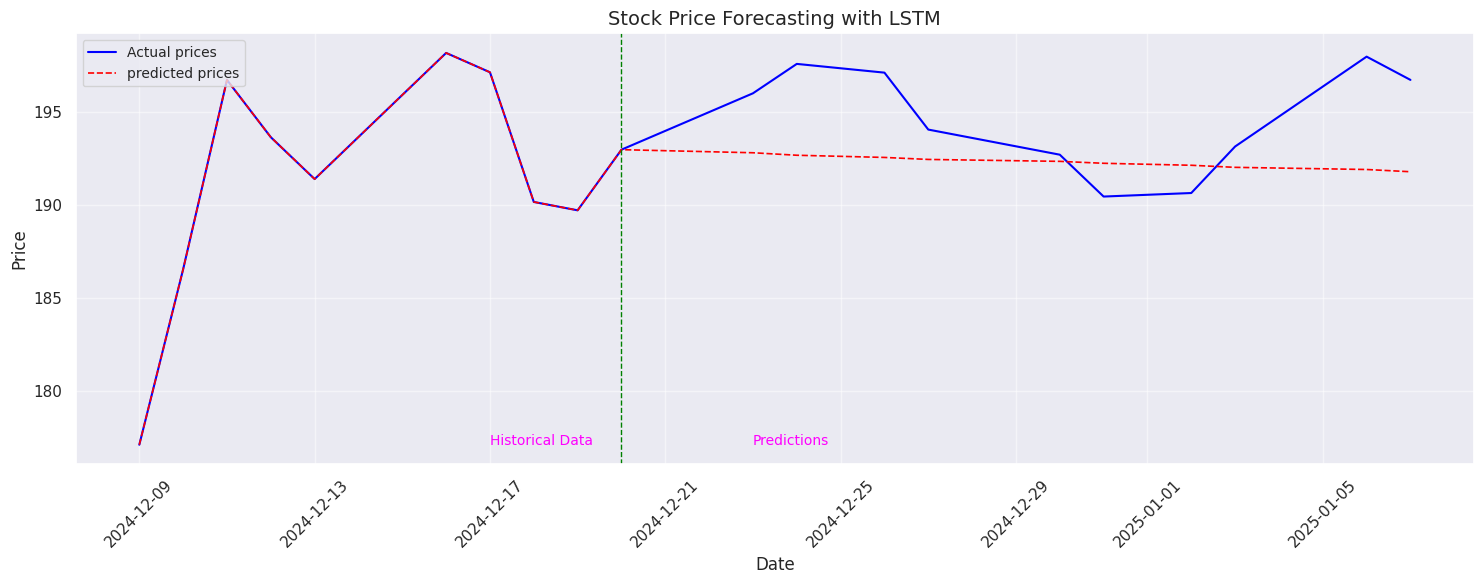

In [49]:
#seq_plot = scaler.inverse_transform(np.array(sequence[:,-20:]).reshape(-1, 1))
training_data_df = pd.DataFrame(training_df['close'].iloc[-10:])
training_data_df['predicted_prices'] = training_df['close'].iloc[-10:]
result_df = pd.concat([training_data_df, test_results_df])
result_df_min = result_df.min().min()
all_results['indicators with daily diff'] = result_df['predicted_prices']
fig, ax = plt.subplots(figsize=(15, 6))

# Main plot
ax.plot(result_df['close'], label='Actual prices', color='blue', linewidth=1.5)
ax.plot(result_df['predicted_prices'], label='predicted prices', linestyle='--', color='red', linewidth=1.2)

# Labels and title
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
ax.set_title("Stock Price Forecasting with LSTM", fontsize=14)
ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.5)

plt.axvline(pd.Timestamp(result_df.index[9]), color='green', linestyle='--', linewidth=1, label='predictions start')

# Add text annotations
plt.text(pd.Timestamp(result_df.index[6]), result_df_min, 'Historical Data', fontsize=10, color='magenta')
plt.text(pd.Timestamp(result_df.index[10]), result_df_min, 'Predictions', fontsize=10, color='magenta')

plt.xticks(rotation=45)
plt.tight_layout()
# Display the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
            - By choosing <b>daily_diff_percent</b> as our target, the prediction behavior has changed slightly, and the output appears more like a straight line.<br>
            - This result might be due to the fact that most of the daily differences in the dataset are very small, causing the model to predict values that align closely with the average daily change rather than capturing significant fluctuations.<br>
        </font>
    </p>
</div>


<a id="indicators_without_diff"></a>
## <p style=" font-family:roboto; color:steelblue; font-size:115%; text-align:left; padding: 0px">6.5 - <span style="color:steelblue;font-weight:bold">indicators without daily diff  📈
    
⬆️ [Section](#RNN)

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
            - As a last resort, we are going to <b>exclude daily_diff_percent</b> from the features fed into the model.<br>
            - The daily_diff_percent will now be used only as the target variable, and the model will rely entirely on other features to make predictions.<br>
        </font>
    </p>
</div>

In [50]:
indicators_diff_df = training_df[['SMA7', 'SMA30', 'EMA15', 'Upper_Band', 'Lower_Band', 'RSI']].copy()

diff_scaler = MinMaxScaler(feature_range=(0, 1))
diff_scaled = diff_scaler.fit_transform(training_df['daily_diff_percent'].values.reshape(-1, 1))

indicator_scaler = MinMaxScaler(feature_range=(0, 1))
indicators_diff_scaled = indicator_scaler.fit_transform(indicators_diff_df)

sequence_length = 180
X, y = [], []
for i in range(len(indicators_diff_scaled) - sequence_length):
    X.append(indicators_diff_scaled[i:i + sequence_length])
    y.append(diff_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)

In [51]:
model = Sequential([
    Input(shape=(X.shape[1], X.shape[2])),
    LSTM(256, return_sequences=True),
    LSTM(128),
    Dense(64, activation='relu'),
    Dense(1) 
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 180, 256)            │         269,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 474,753 (1.81 MB)

 Trainable params: 474,753 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        mode='min'
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001
    )
]

In [53]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=callbacks)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0597 - mae: 0.1757 - mape: 708180.2500 - val_loss: 0.0065 - val_mae: 0.0583 - val_mape: 13.1483 - learning_rate: 0.0010
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0098 - mae: 0.0707 - mape: 248149.5781 - val_loss: 0.0067 - val_mae: 0.0573 - val_mape: 13.5519 - learning_rate: 0.0010
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0078 - mae: 0.0639 - mape: 214951.3594 - val_loss: 0.0074 - val_mae: 0.0656 - val_mape: 13.9542 - learning_rate: 0.0010
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0074 - mae: 0.0603 - mape: 18629.3613 - val_loss: 0.0068 - val_mae: 0.0617 - val_mape: 13.4636 - learning_rate: 0.0010
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0082 - mae: 0.0637 - mape: 378455.0000 - val_loss: 0.0067 - val_mae: 0.0609 - val_mape: 13.3718 - learning_rate: 0.0010
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0080 - mae: 0.0622 - mape: 90

In [54]:
# Initialize the sequence for predictions
sequence = indicators_diff_scaled[-sequence_length:]
predicted_prices = []  # Store all predicted prices

# Extract the close prices for recalculating indicators
previous_closes = pd.Series(training_df['close'].values[-30:])  # Use the last 30 days of close prices

# Predict iteratively for 10 days
for _ in range(10):
    # Ensure the shape of the sequence is correct: (1, sequence_length, features)
    sequence = sequence.reshape(1, sequence_length, 6)
    
    # Predict the next price (scaled)
    next_diff_scaled = model.predict(sequence, verbose=0)
    
    # Inverse transform the scaled prediction to get the real-world price
    next_diff = diff_scaler.inverse_transform([[next_diff_scaled[0, 0]]])[0, 0]
    next_price = previous_closes.iloc[-1] + (previous_closes.iloc[-1] * next_diff / 100)
    predicted_prices.append(next_price)
    
    # Update the close prices for recalculating indicators
    previous_closes = pd.concat([previous_closes, pd.Series([next_price])], ignore_index=True)
    
    # Recalculate indicators dynamically
    new_sma7 = previous_closes.rolling(window=7).mean().iloc[-1]
    new_sma30 = previous_closes.rolling(window=30).mean().iloc[-1]
    new_ema15 = previous_closes.ewm(span=15, adjust=False).mean().iloc[-1]
    new_upper_band = new_sma7 + (2 * previous_closes.rolling(window=7).std().iloc[-1])
    new_lower_band = new_sma7 - (2 * previous_closes.rolling(window=7).std().iloc[-1])
    new_rsi = 100 - (100 / (1 + (previous_closes.diff().clip(lower=0).mean() /
                                 -previous_closes.diff().clip(upper=0).mean())))
    
    # Create the new row of scaled features
    new_row = np.array([new_sma7, new_sma30, new_ema15, new_upper_band, new_lower_band, new_rsi])
    
    # Convert the new row into a DataFrame with the same column names as the original DataFrame
    new_row_df = pd.DataFrame([new_row], columns=indicators_diff_df.columns)
    
    # Scale the new row
    new_row_scaled = indicator_scaler.transform(new_row_df).flatten()
    
    # Update the sequence: remove the first timestep and append the new row
    sequence = np.append(sequence[:, 1:, :], new_row_scaled.reshape(1, 1, -1), axis=1)

# Reverse the scaling for all predicted prices
predicted_prices = pd.Series(predicted_prices, name="Predicted Prices")
test_results_df = pd.DataFrame(test_df['close'])
test_results_df = test_results_df.assign(predicted_prices=predicted_prices.values)

# Display the results
print("Predicted prices for the next 10 days:")
display(test_results_df)

Predicted prices for the next 10 days:


,close,predicted_prices
2024-12-23,195.990005,192.843044
2024-12-24,197.570007,192.737582
2024-12-26,197.100006,192.642599
2024-12-27,194.039993,192.561812
2024-12-30,192.690002,192.497209
2024-12-31,190.440002,192.447468
2025-01-02,190.630005,192.411704
2025-01-03,193.130005,192.388227
2025-01-06,197.960007,192.375465
2025-01-07,196.710007,192.371727


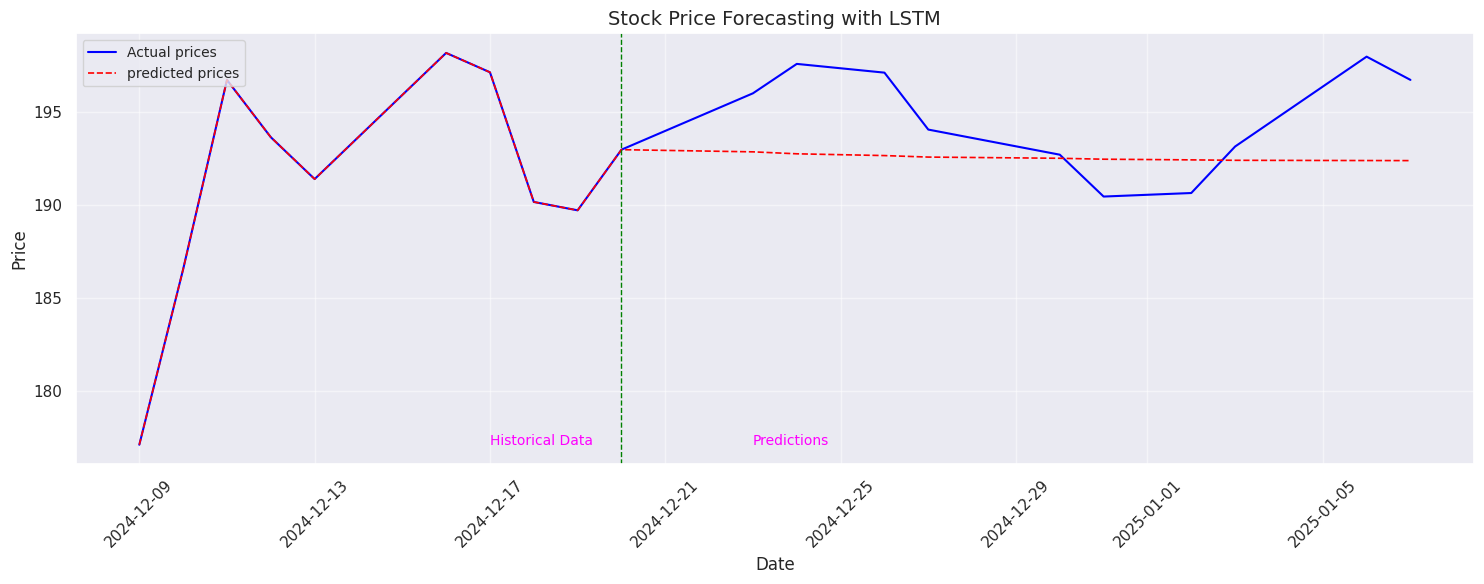

In [55]:
#seq_plot = scaler.inverse_transform(np.array(sequence[:,-20:]).reshape(-1, 1))
training_data_df = pd.DataFrame(training_df['close'].iloc[-10:])
training_data_df['predicted_prices'] = training_df['close'].iloc[-10:]
result_df = pd.concat([training_data_df, test_results_df])
result_df_min = result_df.min().min()
all_results['indicators without daily diff'] = result_df['predicted_prices']
fig, ax = plt.subplots(figsize=(15, 6))

# Main plot
ax.plot(result_df['close'], label='Actual prices', color='blue', linewidth=1.5)
ax.plot(result_df['predicted_prices'], label='predicted prices', linestyle='--', color='red', linewidth=1.2)

# Labels and title
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
ax.set_title("Stock Price Forecasting with LSTM", fontsize=14)
ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.5)

plt.axvline(pd.Timestamp(result_df.index[9]), color='green', linestyle='--', linewidth=1, label='predictions start')

# Add text annotations
plt.text(pd.Timestamp(result_df.index[6]), result_df_min, 'Historical Data', fontsize=10, color='magenta')
plt.text(pd.Timestamp(result_df.index[10]), result_df_min, 'Predictions', fontsize=10, color='magenta')

plt.xticks(rotation=45)
plt.tight_layout()
# Display the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
    <p style="color:navy;">
        <font color="navy">
            - This model is like previous one and it is evident that using daily diff is not a good choice.
        </font>
    </p>
</div>


<a id="result"></a>
# <p style="background-color:powderblue; font-family:roboto; color:navy; font-size:145%;font-weight:bold; text-align:center; border-radius:25px 10px; padding: 10px">7 - Result 📊</p>

⬆️ [Table of Contents](#c_table)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
# Main plot
ax.plot(all_results['close'], label='Actual prices', color='blue', linewidth=1.5)
ax.plot(all_results['predicted prices'], label='close only', linestyle='--', color='red', linewidth=1.2)
ax.plot(all_results['close with indicators'], label='close with indicators', linestyle='--', color='orange', linewidth=1.2)
ax.plot(all_results['indicators without close'], label='indicators without close', linestyle='--', color='#118ab2', linewidth=1.2)
ax.plot(all_results['indicators with daily diff'], label='indicators with daily diff', linestyle='--', color='#ef476f', linewidth=1.2)
ax.plot(all_results['indicators without daily diff'], label='indicators without daily diff', linestyle='--', color='#8ecae6', linewidth=1.2)

# Labels and title
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
ax.set_title("Stock Price Forecasting with LSTM", fontsize=14)
ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.5)

plt.axvline(pd.Timestamp(result_df.index[9]), color='green', linestyle='--', linewidth=1, label='predictions start')
result_df_min = all_results.min().min()
# Add text annotations
plt.text(pd.Timestamp(result_df.index[6]), result_df_min, 'Historical Data', fontsize=10, color='magenta')
plt.text(pd.Timestamp(result_df.index[10]), result_df_min, 'Predictions', fontsize=10, color='magenta')

plt.xticks(rotation=45)
plt.tight_layout()
# Display the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
   <p style="color:navy;">
       <font color="navy">
       💡 <b>Model Insight:</b><br>
       <ul style="color:maroon; padding-left:20px;">
           <li>Using daily differences as target shows poor performance due to the <b>highly skewed distribution</b> of price changes, making the LSTM model biased towards predicting smaller, more common movements.</li>
           <li>Models predicting absolute prices directly (close only, close with indicators) demonstrate better ability to capture the overall price trajectory, suggesting this approach is more suitable for LSTM-based stock forecasting.</li>
           <li>The significant gap between predictions and actual prices in the "indicators with daily diff" approach confirms that skewed target distributions can severely impact LSTM model performance.</li>
       </ul>
       </font>
   </p>
</div>

<div style="border-radius:10px; padding: 15px; background-color: #ADD8E6; font-size:115%; text-align:left">
   <p style="color:navy;">
       <font color="navy">
       ⚠️ <b>Critical Limitation:</b><br>
       <ul style="color:maroon; padding-left:20px;">
           <li>Stock market prediction using only historical prices is fundamentally <b>flawed</b> as markets are influenced by countless external factors.</li>
           <li>Real-world price movements are driven by news events, geopolitical developments, company announcements, and market sentiment - none of which can be predicted from past price patterns alone.</li>
           <li>⛔ Any model based purely on technical analysis or historical data will inherently miss these crucial market-moving factors, making reliable prediction practically impossible.</li>
           <li>🔍 The market's adaptive nature means that even if a predictive pattern is discovered, it typically disappears once enough traders begin exploiting it.</li>
       </ul>
       </font>
   </p>
</div>